# 1. 클러스터링

## 데이터셋 로드

In [23]:
import pandas as pd
df_LH = pd.read_csv('화성_임대단지_정보.csv')
df_share_car_H = pd.read_csv('화성시_공유차량_이용현황_sum.csv')

## 머신러닝용 데이터 전처리

- |공공주택단지 | 공유차량주차장 유무 1/0 |  공영주차장 (반경 1km) 유무 1/0  | 세대수 | 주차면수 |   로 클러스터링용 데이터 구성
- 클러스터를 기준으로 공유차량을 어디에 배치할지 파악

### 단지별 반경 1km 이냐에 공영주차장 유무 현황 파악

In [25]:
from math import radians, sin, cos, sqrt, atan2

df_parking = pd.read_csv('주차장_정보.csv')

# Haversine 거리 계산 함수
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # 지구의 반지름 (km)
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# 주택에서 반경 1km 이내 공영주차장 유무 확인
def check_parking_nearby(house_lat, house_lon, parking_df, radius=1.0):
    for _, row in parking_df.iterrows():
        parking_lat, parking_lon = row['위도'], row['경도']
        distance = haversine(house_lat, house_lon, parking_lat, parking_lon)
        if distance <= radius:
            return 1 # 1이면 주차장 있음, 0이면 주차장 없음
    return 0

# 결과 열 추가
df_LH['주차장유무'] = df_LH.apply(lambda x: check_parking_nearby(x['위도'], x['경도'], df_parking), axis=1)

# 데이터프레임 전체 출력 설정
pd.set_option('display.max_rows', None)

df_1km_parking = df_LH.drop(['단지 명','공급/지원유형', '세대수', '주차면수', '경도', '위도'], axis=1)

df_1km_parking


,단지 코드,주차장유무
0,C00414,1
1,C00415,1
2,C00416,1
3,C00447,0
4,C01566,1
5,C01567,1
6,C01568,1
7,C01569,1
8,C01570,1
9,C01571,1


In [26]:
df_1km_parking['공유주차장여부'] = df_LH['단지 코드'].isin(df_share_car_H['단지 코드']).astype(int)

In [27]:
df_class = df_1km_parking.merge(df_share_car_H[['단지 코드', '대수']], on='단지 코드', how='left')

df_class

,단지 코드,주차장유무,공유주차장여부,대수
0,C00414,1,0,NaN
1,C00415,1,0,NaN
2,C00416,1,0,NaN
3,C00447,0,0,NaN
4,C01566,1,0,NaN
5,C01567,1,0,NaN
6,C01568,1,0,NaN
7,C01569,1,1,1.0
8,C01570,1,0,NaN
9,C01571,1,1,2.0


In [28]:
df_class['대수'] = df_class['대수'].fillna(0.0)

In [29]:
df_1st_cluster = df_LH[['세대수', '주차면수']]
df_1st_cluster['공공주차장유무'] = df_class['주차장유무'] 
df_1st_cluster['공유차량유무'] = df_class['공유주차장여부']
df_1st_cluster

C:\Users\Haeun\AppData\Local\Temp\ipykernel_26976\3467707771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1st_cluster['공공주차장유무'] = df_class['주차장유무']
C:\Users\Haeun\AppData\Local\Temp\ipykernel_26976\3467707771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1st_cluster['공유차량유무'] = df_class['공유주차장여부']


,세대수,주차면수,공공주차장유무,공유차량유무
0,1178,1767.0,1,0
1,990,1485.0,1,0
2,836,1254.0,1,0
3,649,973.5,0,0
4,682,1023.0,1,0
5,534,801.0,1,0
6,231,346.5,1,0
7,963,1444.5,1,1
8,9,13.5,1,0
9,2342,3513.0,1,1


In [31]:
pd.reset_option

## 클러스터링 

In [32]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 클러스터 3개로 시도
kmeans = KMeans(n_clusters=3, random_state= 0 )
kmeans.fit(df_1st_cluster)
df_1st_cluster['cluster'] = kmeans.labels_

df_1st_cluster

C:\Users\Haeun\AppData\Local\Temp\ipykernel_26976\2914991948.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1st_cluster['cluster'] = kmeans.labels_


,세대수,주차면수,공공주차장유무,공유차량유무,cluster
0,1178,1767.0,1,0,0
1,990,1485.0,1,0,0
2,836,1254.0,1,0,0
3,649,973.5,0,0,0
4,682,1023.0,1,0,0
5,534,801.0,1,0,1
6,231,346.5,1,0,1
7,963,1444.5,1,1,0
8,9,13.5,1,0,1
9,2342,3513.0,1,1,2


## 교차검증

In [33]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    import math

    n_clusters = len(cluster_lists)

    n_cols = min(n_clusters, 5)
    n_rows = math.ceil(n_clusters / n_cols)

    fig, axs = plt.subplots(figsize=(4 * n_cols, 4 * n_rows), nrows=n_rows, ncols=n_cols)

    axs = np.array(axs).reshape(-1) if n_clusters > 1 else [axs]

    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title(f'Number of Clusters: {n_cluster}\nSilhouette Score: {round(sil_avg, 3)}')
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

    for ax in axs[n_clusters:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [34]:
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import math

    n_clusters = len(cluster_lists)
    n_cols = min(n_clusters, 5)
    n_rows = math.ceil(n_clusters / n_cols)

    fig, axs = plt.subplots(figsize=(4 * n_cols, 4 * n_rows), nrows=n_rows, ncols=n_cols)

    axs = np.array(axs).reshape(-1) if n_clusters > 1 else [axs]

    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1', 'PCA2'])

    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster'] = cluster_labels

        unique_labels = np.unique(cluster_labels)
        markers = ['o', 's', '^', 'x', '*', 'D', 'v', 'p', 'H', '+']

        for label in unique_labels:
            label_df = dataframe[dataframe['cluster'] == label]
            cluster_legend = f'Cluster {label}' if label != -1 else 'Noise'
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
                             edgecolor='k', marker=markers[label % len(markers)], label=cluster_legend)

        axs[ind].set_title(f'Number of Clusters: {n_cluster}')
        axs[ind].legend(loc='upper right')

    for ax in axs[n_clusters:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler

X_features = df_1st_cluster.values
X_features_scaled = StandardScaler().fit_transform(X_features)

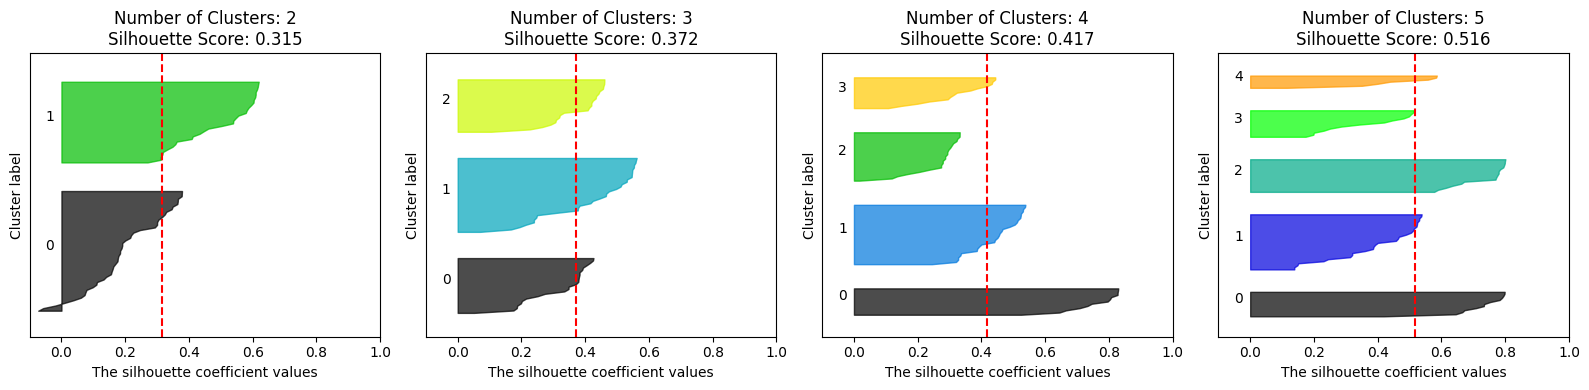

In [36]:
visualize_silhouette([2,3,4,5], X_features_scaled)

C:\Users\Haeun\AppData\Local\Temp\ipykernel_26976\3892084.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
C:\Users\Haeun\AppData\Local\Temp\ipykernel_26976\3892084.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,


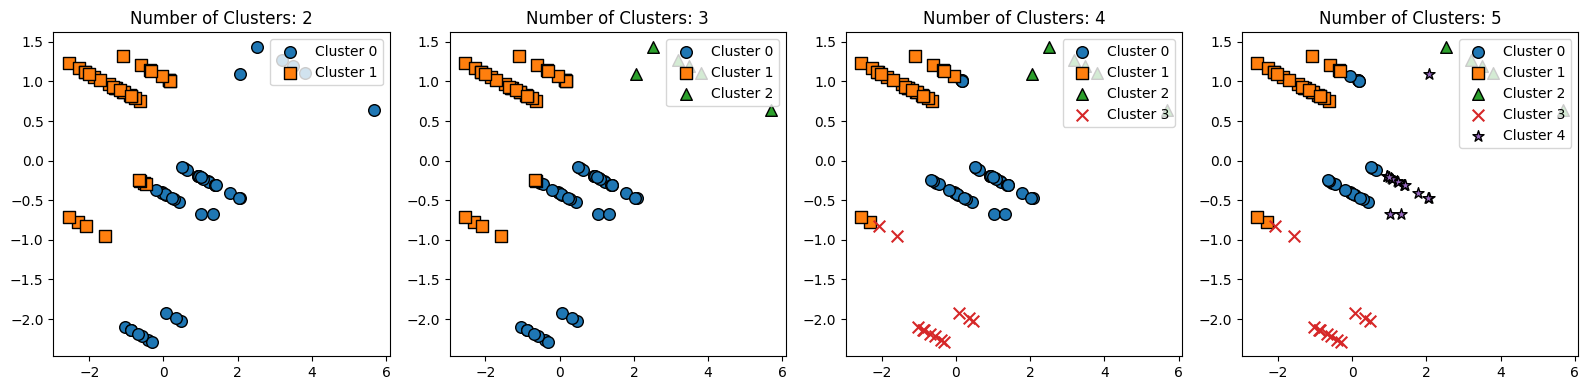

In [37]:
visualize_kmeans_plot_multi([2,3,4,5], X_features_scaled)

데이터가 사선으로 표시되는 현상이 나타난다

In [38]:
df_1st_cluster.columns

Index(['세대수', '주차면수', '공공주차장유무', '공유차량유무', 'cluster'], dtype='object')

In [39]:
# 로그스케일 

import numpy as np
from sklearn.metrics import silhouette_score

df_1st_cluster['세대수_log'] = np.log1p(df_1st_cluster['세대수'])
df_1st_cluster['주차면수_log'] = np.log1p(df_1st_cluster['주차면수'])
df_1st_cluster['공공주차장유무_log'] = np.log1p(df_1st_cluster['공공주차장유무'])
df_1st_cluster['공유차량유무_log'] = np.log1p(df_1st_cluster['공유차량유무'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = df_1st_cluster[['세대수_log','주차면수_log','공공주차장유무_log','공유차량유무_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

# Kmean알고리즘 설정 및 예측
kmean = KMeans(n_clusters=5, random_state=0)
labels = kmean.fit_predict(X_features_scaled)

# 결과 label추가
df_1st_cluster['log_cluster'] = labels

# 실루엣스코어 계산
silhouette_score(X_features_scaled, labels)



C:\Users\Haeun\AppData\Local\Temp\ipykernel_26976\434713143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1st_cluster['세대수_log'] = np.log1p(df_1st_cluster['세대수'])
C:\Users\Haeun\AppData\Local\Temp\ipykernel_26976\434713143.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1st_cluster['주차면수_log'] = np.log1p(df_1st_cluster['주차면수'])


np.float64(0.5394827660470896)

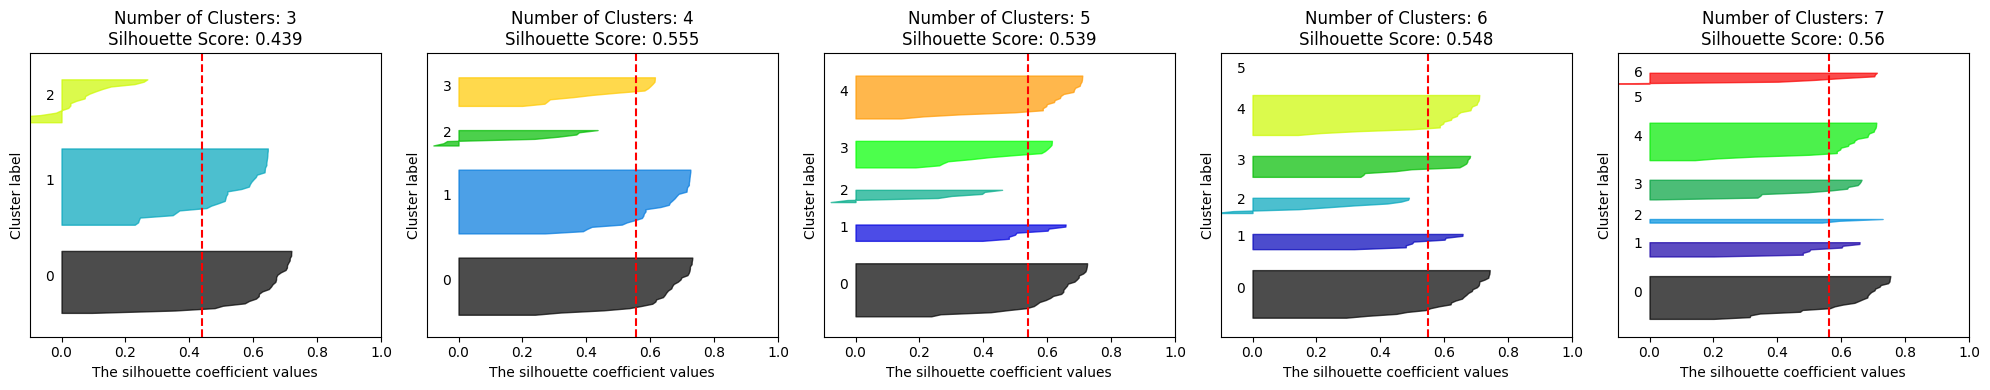

C:\Users\Haeun\AppData\Local\Temp\ipykernel_26976\3892084.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
C:\Users\Haeun\AppData\Local\Temp\ipykernel_26976\3892084.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
C:\Users\Haeun\AppData\Local\Temp\ipykernel_26976\3892084.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
C:\Users\Haeun\AppData\Local\Temp\ipykernel

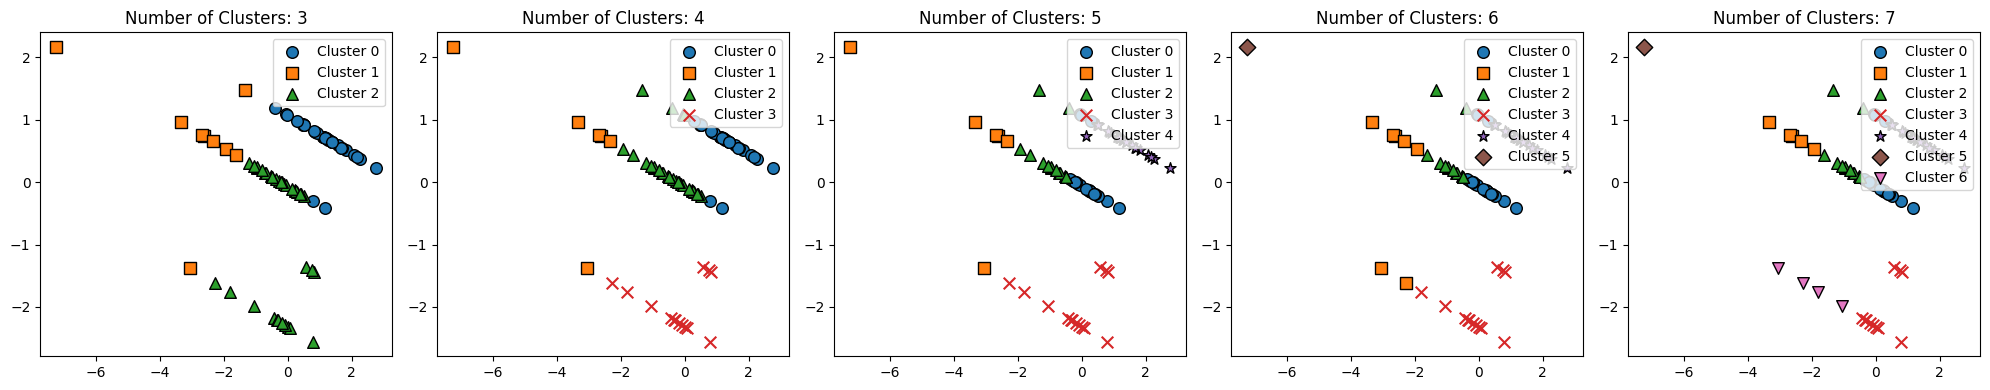

In [40]:
visualize_silhouette([3,4,5,6,7], X_features_scaled)
visualize_kmeans_plot_multi([3,4,5,6,7], X_features_scaled)

- 로그스케일을 실행해도 사선으로 데이터가 표시된다. 무엇이 문제일까?

In [43]:
from kmodes.kprototypes import KPrototypes
# 연속/이진 구분
contin = df_1st_cluster[['세대수']]
bi = df_1st_cluster[['공공주차장유무', '공유차량유무']]

# 연속형 스케일링
scaler = StandardScaler()
contin_scaled = scaler.fit_transform(contin)

# 연속/이진 결합
combine_data = np.hstack([contin_scaled, bi])

# k-프로토타입
kproto = KPrototypes(n_clusters=3, init='Cao', random_state=11)
clusters = kproto.fit_predict(combine_data, categorical=[1, 2])

df_1st_cluster['kmodes_cluster'] = clusters

# 클러스터별 데이터 포인트 개수 확인
cluster_count = df_1st_cluster['kmodes_cluster'].value_counts().sort_index()
cluster_count

kmodes_cluster
0    35
1    35
2     9
Name: count, dtype: int64

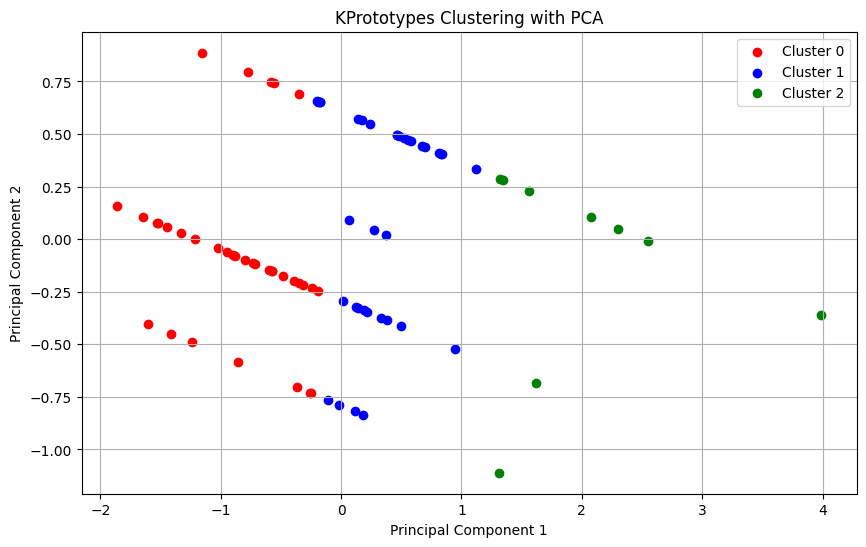

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(combine_data)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['cluster'] = clusters

plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for cluster in np.unique(clusters):
    cluster_data = reduced_df[reduced_df['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                label=f'Cluster {cluster}', color=colors[cluster])

plt.title('KPrototypes Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [45]:
cluster_means = df_1st_cluster.groupby('kmodes_cluster').mean()
print("\n클러스터별 평균 수치:")
print(cluster_means)


클러스터별 평균 수치:
                        세대수         주차면수   공공주차장유무    공유차량유무   cluster  \
kmodes_cluster                                                           
0                420.485714   630.728571  0.800000  0.142857  0.800000   
1                861.485714  1292.228571  0.800000  0.628571  0.114286   
2               1542.111111  2313.166667  0.888889  0.777778  1.555556   

                 세대수_log  주차면수_log  공공주차장유무_log  공유차량유무_log  log_cluster  
kmodes_cluster                                                            
0               5.847835  6.251341     0.554518    0.099021     1.057143  
1               6.746590  7.151657     0.554518    0.435693     2.428571  
2               7.321957  7.727198     0.616131    0.539114     3.444444  


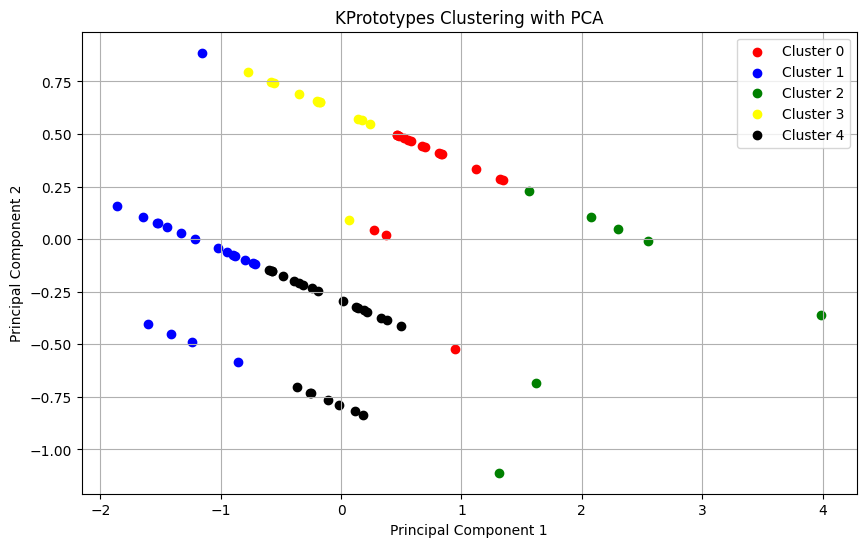

In [46]:
# 클러스터 갯수별
kproto = KPrototypes(n_clusters=5, init='Cao', random_state=11)
clusters = kproto.fit_predict(combine_data, categorical=[1, 2])

df_1st_cluster['kmodes_cluster'] = clusters

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(combine_data)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['cluster'] = clusters

plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green','yellow','black']
for cluster in np.unique(clusters):
    cluster_data = reduced_df[reduced_df['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                label=f'Cluster {cluster}', color=colors[cluster])

plt.title('KPrototypes Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [47]:
explained_variance = pca.explained_variance_ratio_
print(f"첫 번째 주성분 설명력: {explained_variance[0]:.2f}")
print(f"두 번째 주성분 설명력: {explained_variance[1]:.2f}")

첫 번째 주성분 설명력: 0.75
두 번째 주성분 설명력: 0.15


세대 수와 주차면수의 상관관계가 너무 높다 <br>
두번째 시도에서는, <br>
1. 세대 수와 주차면수 둘 중 하나만 사용
2. 이진분류인 공유차량유무와 공공주차장유무를 하나의 열로 범주화 하여 다시 클러스터링을 진행해본다.

In [48]:
# 2차시 파생변수 생성
df_2nd_cluster = df_1st_cluster[['세대수', '주차면수']]
df_2nd_cluster['공유_공영'] = df_1st_cluster[ '공유차량유무']*1 + df_1st_cluster['공공주차장유무']*2
df_2nd_cluster

C:\Users\Haeun\AppData\Local\Temp\ipykernel_26976\3376582906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2nd_cluster['공유_공영'] = df_1st_cluster[ '공유차량유무']*1 + df_1st_cluster['공공주차장유무']*2


,세대수,주차면수,공유_공영
0,1178,1767.0,2
1,990,1485.0,2
2,836,1254.0,2
3,649,973.5,0
4,682,1023.0,2
5,534,801.0,2
6,231,346.5,2
7,963,1444.5,3
8,9,13.5,2
9,2342,3513.0,3


C:\Users\Haeun\AppData\Local\Temp\ipykernel_26976\3892084.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
C:\Users\Haeun\AppData\Local\Temp\ipykernel_26976\3892084.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
C:\Users\Haeun\AppData\Local\Temp\ipykernel_26976\3892084.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
C:\Users\Haeun\AppData\Local\Temp\ipykernel

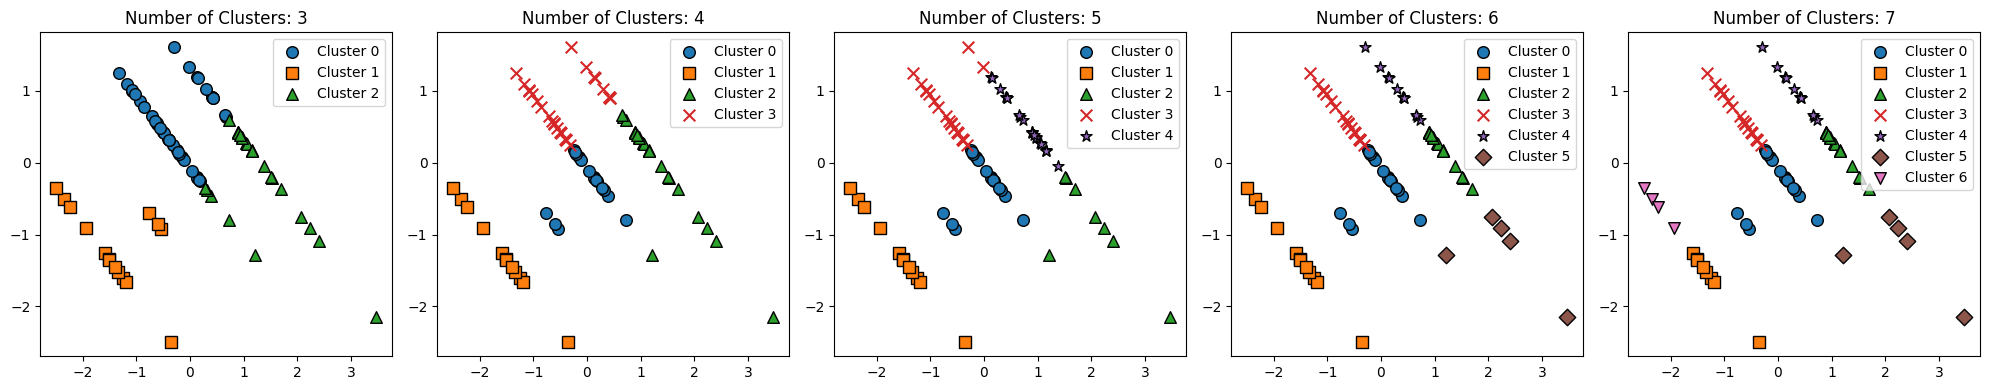

In [49]:
X_features = df_2nd_cluster[['세대수','공유_공영']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

visualize_kmeans_plot_multi([3,4,5,6,7], X_features_scaled)

- 마찬가지로 사선형의 데이터가 나타난다.
- 또한, 현재 화성시의 데이터를 통해 ‘공공주택’내의 ‘공유차량’의 규모를 학습 후 같은 기준으로 하남시에 적용해야 하므로, 어느곳에 얼만큼 배치해야 좋을지 인사이트가 필요한 상황.
- 따라서, 클러스터링으로 유의미한 군집을 확인하기 어렵다.


# 2. SARIMA

- 분석방향을 바꾸어, 화성시와 하남시의 공유차량이용 현황을 시계열로 분석해 앞으로의 이용 현황을 예측 후, 그에 따라 차량대수를 추가로 배치하기로 함. 

### 화성시 공유차량 이용 현황

#### 데이터셋 로드

In [50]:
import pandas as pd
dfhw_car = pd.read_csv('car_sharing_data_full.csv')
dfhw_car

,Unnamed: 0,단지 명칭,단지 코드,2020년8월 이용 건수,2020년8월 이용 시간,2020년9월 이용 건수,2020년9월 이용 시간,2020년10월 이용 건수,2020년10월 이용 시간,2020년11월 이용 건수,...,2023년10월 이용 건수,2023년10월 이용 시간,2023년11월 이용 건수,2023년11월 이용 시간,2023년12월 이용 건수,2023년12월 이용 시간,전체 건수,전체 시간,차종,대수
0,0,화성남양뉴타운10,C02347,41,152,42,181,26,82,35,...,15,25,9,21,8,29,864,2886,모닝어반,1.0
1,1,화성남양뉴타운4,C01961,25,224,6,43,1,6,2,...,0,0,0,0,0,0,104,645,NaN,NaN
2,2,화성남양뉴타운9,C02042,11,82,13,20,22,17,36,...,0,0,0,0,0,0,889,2151,NaN,NaN
3,3,화성능동7-2,C01569,45,142,44,117,63,263,39,...,23,37,25,29,27,50,1402,3912,더뉴레이,1.0
4,4,화성동탄2 28(행복주택),C02333,55,128,63,169,45,102,47,...,26,54,41,93,45,74,2131,6514,더뉴레이/올뉴모닝,2.0
5,5,화성동탄2 레이크빌,C01890,13,26,19,44,22,122,14,...,8,21,4,3,0,0,941,2591,올뉴모닝,1.0
6,6,화성동탄2 르파비스,C02014,31,125,25,85,39,119,36,...,27,37,30,35,13,16,1516,4974,올뉴K3,1.0
7,7,화성동탄2 서희스타힐스24,C02015,26,165,31,90,24,91,29,...,30,35,17,28,31,62,1598,4010,더뉴레이,1.0
8,8,화성동탄2 센트럴써밋,C02329,0,0,0,0,0,0,5,...,36,50,49,78,44,108,1375,3669,더뉴레이,1.0
9,9,화성동탄2 아너스빌,C02160,22,72,23,92,28,90,30,...,24,45,18,42,16,91,1261,4510,더뉴레이,1.0


In [51]:
dfhw_car['대수'] = dfhw_car['대수'].fillna(1.0)
dfhw_car['차종'] = dfhw_car['차종'].fillna('더뉴레이')

In [53]:
dfhw_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 89 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      30 non-null     int64  
 1   단지 명칭           30 non-null     object 
 2   단지 코드           30 non-null     object 
 3   2020년8월 이용 건수   30 non-null     int64  
 4   2020년8월 이용 시간   30 non-null     int64  
 5   2020년9월 이용 건수   30 non-null     int64  
 6   2020년9월 이용 시간   30 non-null     int64  
 7   2020년10월 이용 건수  30 non-null     int64  
 8   2020년10월 이용 시간  30 non-null     int64  
 9   2020년11월 이용 건수  30 non-null     int64  
 10  2020년11월 이용 시간  30 non-null     int64  
 11  2020년12월 이용 건수  30 non-null     int64  
 12  2020년12월 이용 시간  30 non-null     int64  
 13  2021년1월 이용 건수   30 non-null     int64  
 14  2021년1월 이용 시간   30 non-null     int64  
 15  2021년2월 이용 건수   30 non-null     int64  
 16  2021년2월 이용 시간   30 non-null     int64  
 17  2021년3월 이용 건수   30 non-null     int64

#### 머신러닝용 데이터 전처리

- ARIMA 알고리즘을 사용하려면, |시간|값|의 데이터셋이어야 한다.

In [52]:
df_hw_time = dfhw_car[['단지 명칭','2020년8월 이용 시간',
 '2020년9월 이용 시간',
 '2020년10월 이용 시간',
 '2020년11월 이용 시간',
 '2020년12월 이용 시간',
 '2021년1월 이용 시간',
 '2021년2월 이용 시간',
 '2021년3월 이용 시간',
 '2021년4월 이용 시간',
 '2021년5월 이용 시간',
 '2021년6월 이용 시간',
 '2021년7월 이용 시간',
 '2021년8월 이용 시간',
 '2021년9월 이용 시간',
 '2021년10월 이용 시간',
 '2021년11월 이용 시간',
 '2021년12월 이용 시간',
 '2022년1월 이용 시간',
 '2022년2월 이용 시간',
 '2022년3월 이용 시간',
 '2022년4월 이용 시간',
 '2022년5월 이용 시간',
 '2022년6월 이용 시간',
 '2022년7월 이용 시간',
 '2022년8월 이용 시간',
 '2022년9월 이용 시간',
 '2022년10월 이용 시간',
 '2022년11월 이용 시간',
 '2022년12월 이용 시간',
 '2023년1월 이용 시간',
 '2023년2월 이용 시간',
 '2023년3월 이용 시간',
 '2023년4월 이용 시간',
 '2023년5월 이용 시간',
 '2023년6월 이용 시간',
 '2023년7월 이용 시간',
 '2023년8월 이용 시간',
 '2023년9월 이용 시간',
 '2023년10월 이용 시간',
 '2023년11월 이용 시간',
 '2023년12월 이용 시간', '대수']]

In [54]:
df_hw_time['대수'].value_counts()

대수
1.0    25
2.0     4
4.0     1
Name: count, dtype: int64

In [70]:
count_hw1 = df_hw_time[df_hw_time['대수'] == 1.0]
count_hw2 = df_hw_time[df_hw_time['대수'] == 2.0]
count_hw4 = df_hw_time[df_hw_time['대수'] == 4.0]

In [56]:
count_hw1.describe()

,2020년8월 이용 시간,2020년9월 이용 시간,2020년10월 이용 시간,2020년11월 이용 시간,2020년12월 이용 시간,2021년1월 이용 시간,2021년2월 이용 시간,2021년3월 이용 시간,2021년4월 이용 시간,2021년5월 이용 시간,...,2023년4월 이용 시간,2023년5월 이용 시간,2023년6월 이용 시간,2023년7월 이용 시간,2023년8월 이용 시간,2023년9월 이용 시간,2023년10월 이용 시간,2023년11월 이용 시간,2023년12월 이용 시간,대수
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
mean,76.080000,63.600000,70.120000,68.360000,66.440000,70.400000,72.360000,71.760000,93.240000,89.640000,...,61.200000,60.960000,43.200000,46.520000,34.640000,28.000000,18.320000,19.760000,22.800000,1.0
std,77.060539,69.313298,79.853679,67.702093,69.212884,68.324593,59.800975,64.145849,87.475844,68.204277,...,49.929116,53.576643,31.864296,38.248224,35.833969,35.884073,21.936879,24.752576,31.788363,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,16.000000,13.000000,9.000000,22.000000,21.000000,45.000000,40.000000,...,10.000000,9.000000,15.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,55.000000,43.000000,54.000000,58.000000,60.000000,68.000000,62.000000,66.000000,82.000000,80.000000,...,57.000000,52.000000,46.000000,44.000000,27.000000,3.000000,6.000000,3.000000,0.000000,1.0
75%,142.000000,92.000000,91.000000,102.000000,76.000000,99.000000,91.000000,93.000000,118.000000,126.000000,...,105.000000,102.000000,63.000000,64.000000,55.000000,48.000000,35.000000,35.000000,39.000000,1.0
max,235.000000,279.000000,265.000000,294.000000,308.000000,279.000000,216.000000,288.000000,420.000000,272.000000,...,154.000000,164.000000,112.000000,136.000000,126.000000,103.000000,78.000000,78.000000,108.000000,1.0


In [83]:
# 확인해보니 평균과 중앙값 차이가 크게 나지 않아 평균으로 계산
mean_values1 = count_hw1.describe().loc["mean"]
mean_values2 = count_hw2.describe().loc["mean"]

# 평균값을 한 줄짜리 데이터프레임으로 변환
mean_df_hw1 = pd.DataFrame([mean_values1], columns=mean_values1.index)
mean_df_hw2 = pd.DataFrame([mean_values2], columns=mean_values2.index)

# 4대를 가진 공유차량주차장은 1곳이므로 데이터를 그대로 사용
mean_df_hw4 = count_hw4

In [84]:
# 열과 행 위치를 변경
df_hw1_t = mean_df_hw1.transpose()
df_hw2_t = mean_df_hw2.transpose()
df_hw4_t = mean_df_hw4.transpose()

df_hw4_t = df_hw4_t[1:]

In [85]:
# 인덱스 리셋
df_hw1_t = df_hw1_t.reset_index()
df_hw2_t = df_hw2_t.reset_index()
df_hw4_t = df_hw4_t.reset_index()

In [86]:
# 마지막행인 '대수' 삭제
df_hw1_t = df_hw1_t.drop(df_hw1_t.index[-1])
df_hw2_t = df_hw2_t.drop(df_hw2_t.index[-1])
df_hw4_t = df_hw4_t.drop(df_hw4_t.index[-1])

In [87]:
# 열이름 변경
df_hw1_t.columns = ['시간', '값']
df_hw2_t.columns = ['시간', '값']
df_hw4_t.columns = ['시간', '값']

df_hw4_t['값'] = df_hw4_t['값'].astype(int)

In [88]:
# datetime으로 '시간'열 값 변경
df_hw1_t["시간"] = pd.to_datetime(
    df_hw1_t["시간"].str.replace(" 이용 시간", "").str.replace("년", "-").str.replace("월", ""),
    format="%Y-%m"
)
df_hw2_t["시간"] = pd.to_datetime(
    df_hw2_t["시간"].str.replace(" 이용 시간", "").str.replace("년", "-").str.replace("월", ""),
    format="%Y-%m"
)
df_hw4_t["시간"] = pd.to_datetime(
    df_hw4_t["시간"].str.replace(" 이용 시간", "").str.replace("년", "-").str.replace("월", ""),
    format="%Y-%m"
)

### 시계열 진행

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller # 정상성 ADF테스트

from statsmodels.tsa.arima.model import ARIMA # ARIMA 모델
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # ARIMA의 파라미터를 시각화하는 플롯

#### 1대

In [ ]:
# ADF 테스트
result = adfuller(df_hw1_t['값'])
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 0.8393367151689588


In [ ]:
df_hw1_t['Value_diff'] = df_hw1_t['값'].diff()

In [ ]:
df_hw1_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   시간          41 non-null     datetime64[ns]
 1   값           41 non-null     float64       
 2   Value_diff  40 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.1 KB


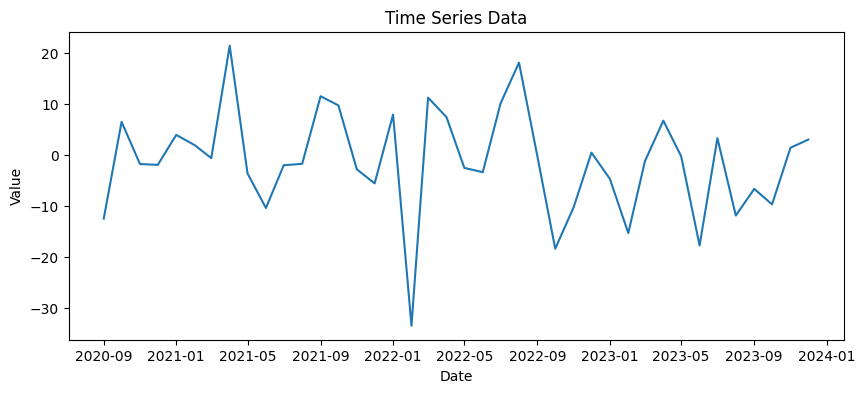

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_hw1_t['시간'][1:], df_hw1_t['Value_diff'][1:])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [ ]:
result = adfuller(df_hw1_t['Value_diff'].dropna())
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 8.385247680220783e-09


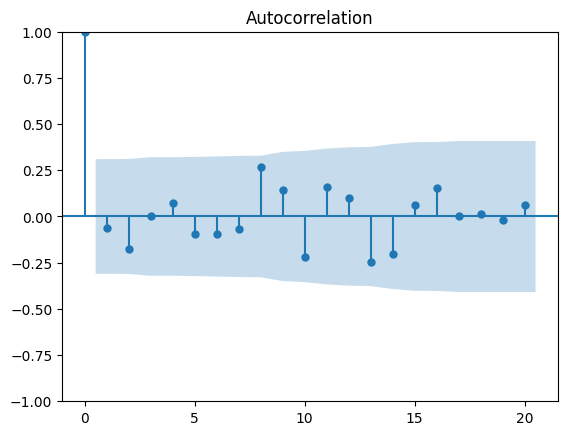

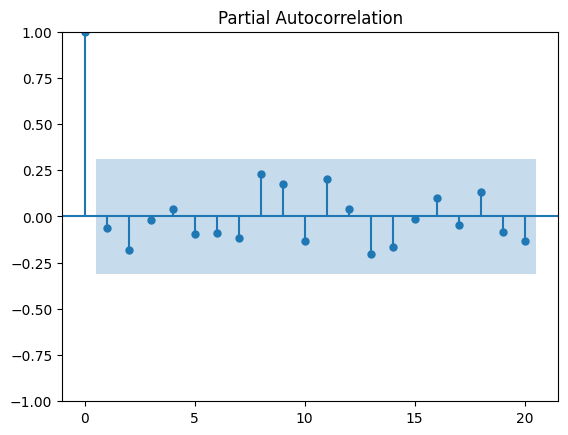

In [ ]:
# ACF 및 PACF 플롯
plot_acf(df_hw1_t['Value_diff'].dropna(), lags=20)
plt.show()

plot_pacf(df_hw1_t['Value_diff'].dropna(), lags=20)
plt.show()

In [ ]:
# ARIMA 모델 학습
order = (0, 1, 0)  # (p, d, q)
#                 pacf, d, acf
model = ARIMA(df_hw1_t['값'], order = order)
fitted_model = model.fit()

# 모델 요약
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      값   No. Observations:                   41
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -150.151
Date:                Wed, 22 Jan 2025   AIC                            302.301
Time:                        17:07:34   BIC                            303.990
Sample:                             0   HQIC                           302.912
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       106.6619     18.318      5.823      0.000      70.759     142.564
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 3.95
Prob(Q):                              0.68   Pr

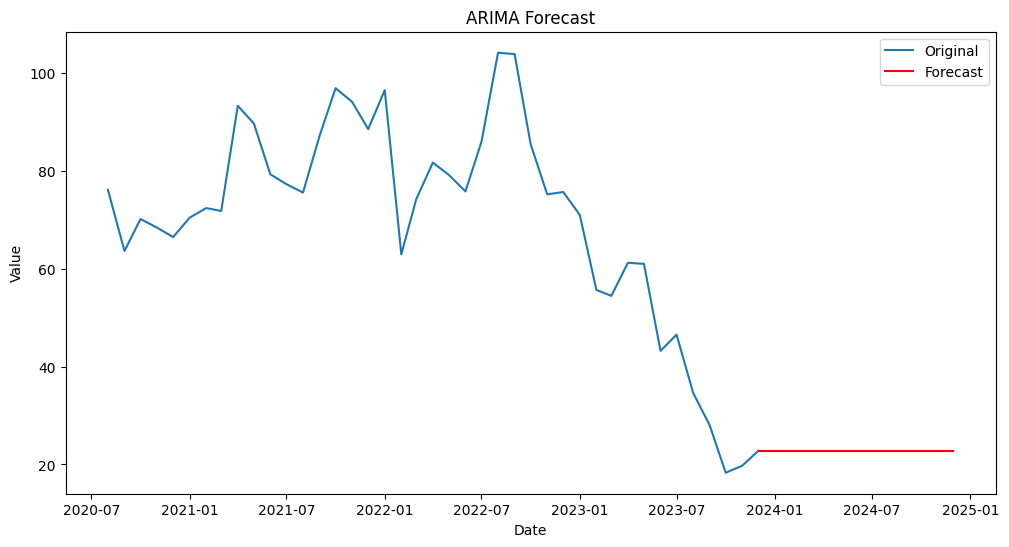

In [ ]:
forecast_steps = 365  # 365일 예측
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=df_hw1_t['시간'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:]

# 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_hw1_t['시간'], df_hw1_t['값'], label='Original')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Haeun\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


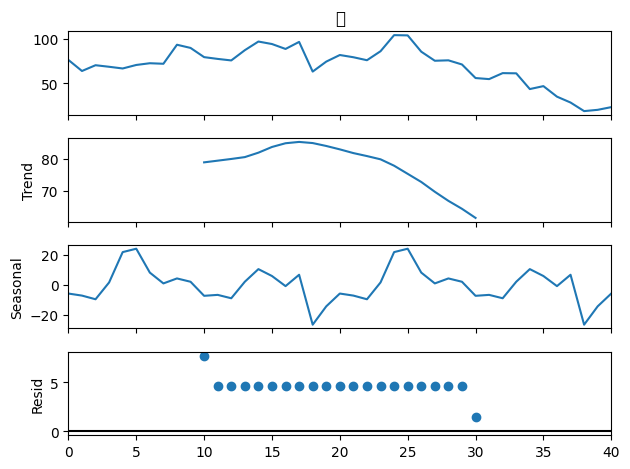

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 분해
decomp = seasonal_decompose(df_hw1_t['값'], model='additive', period=20)
# 분해 결과 시각화
decomp.plot()
plt.show()

# Trend : 경향성
# Seasonal : 계절성
# Resid : 설명되지 않는 불규칙한 변동

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
seasonal_order = (1, 1, 1, 20)
#                 P, D, Q, s
#         계절적 자기회귀, 계절적 차분, 계절적 이동평균, 주기

In [ ]:
# SARIMAX 모델 학습
sarima_model = SARIMAX(df_hw1_t['값'], order=(0,1,0), seasonal_order=seasonal_order)
fitted_sarima_model = sarima_model.fit()

c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


C:\Users\Haeun\AppData\Local\Temp\ipykernel_3308\576392434.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates_sarima = pd.date_range(start=df_1_t['시간'].iloc[-1], periods=step + 1, freq='M')[1:]


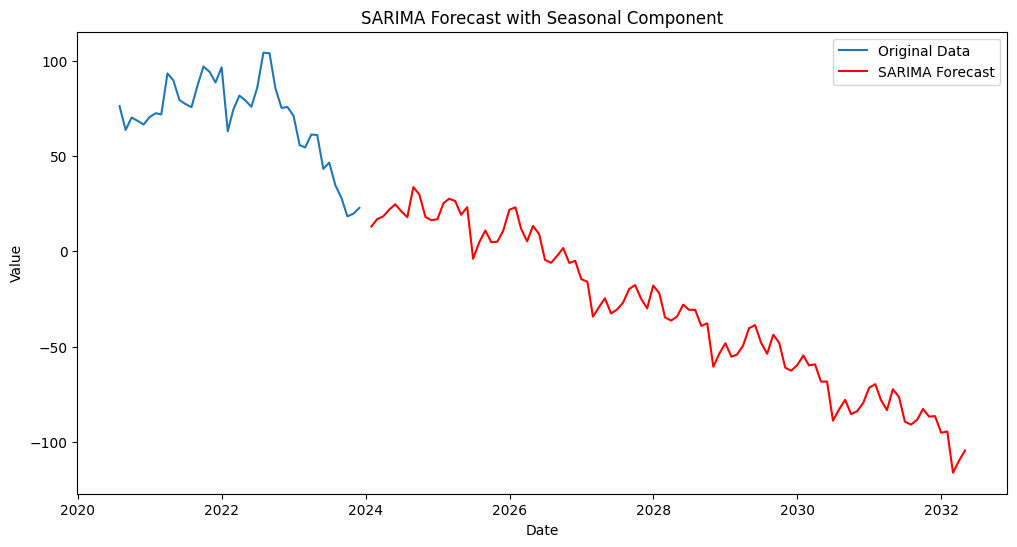

In [ ]:
step = 12
forecast_sarima = fitted_sarima_model.forecast(steps=step)
forecast_dates_sarima = pd.date_range(start=df_hw1_t['시간'].iloc[-1], periods=step + 1, freq='M')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df_hw1_t['시간'], df_hw1_t['값'], label='Original Data')
plt.plot(forecast_dates_sarima, forecast_sarima, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast with Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

#### 2대

In [ ]:
# ADF 테스트
result = adfuller(df_hw2_t['값'])
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 0.5756441413610528


In [ ]:
# ADF 테스트
result = adfuller(df_hw2_t['값'])
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 0.5756441413610528


In [ ]:
df_hw2_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   시간          41 non-null     datetime64[ns]
 1   값           41 non-null     float64       
 2   Value_diff  40 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.1 KB


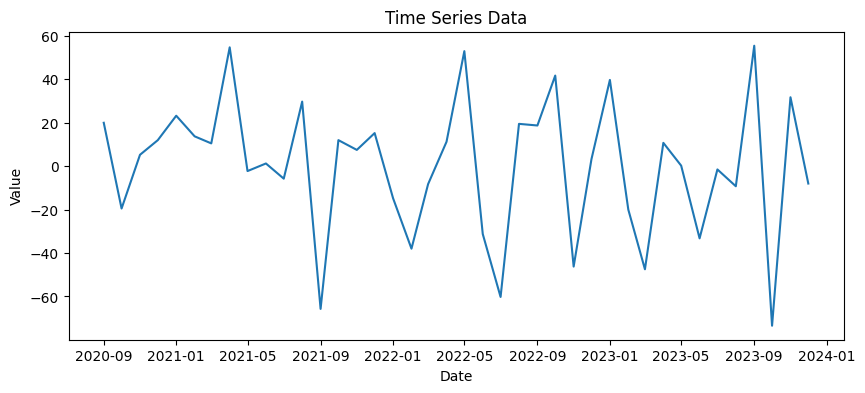

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_hw2_t['시간'][1:], df_hw2_t['Value_diff'][1:])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [ ]:
result = adfuller(df_hw2_t['Value_diff'].dropna())
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 8.671326293121004e-06


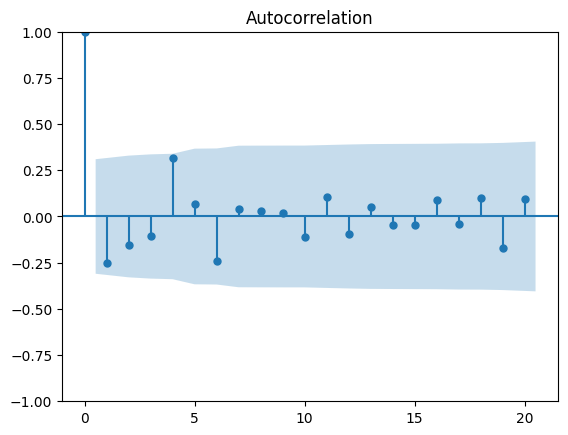

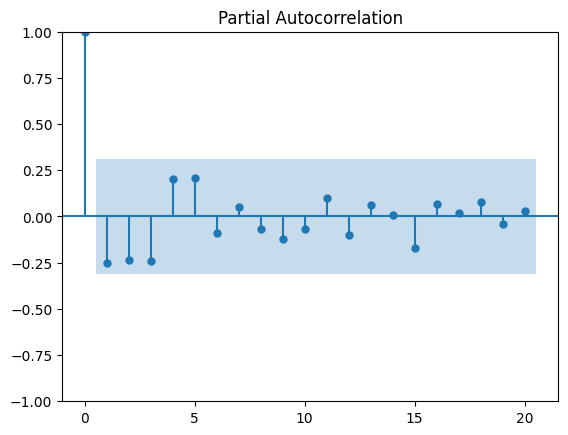

In [ ]:
# ACF 및 PACF 플롯
plot_acf(df_hw2_t['Value_diff'].dropna(), lags=20)
plt.show()

plot_pacf(df_hw2_t['Value_diff'].dropna(), lags=20)
plt.show()

In [ ]:
# ARIMA 모델 학습
order = (0, 1, 0)  # (p, d, q)
#                 pacf, d, acf
model = ARIMA(df_hw2_t['값'], order = order)
fitted_model = model.fit()

# 모델 요약
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      값   No. Observations:                   41
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -194.644
Date:                Wed, 22 Jan 2025   AIC                            391.288
Time:                        17:34:56   BIC                            392.977
Sample:                             0   HQIC                           391.898
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       986.6592    231.060      4.270      0.000     533.789    1439.529
Ljung-Box (L1) (Q):                   2.78   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.10   Pr

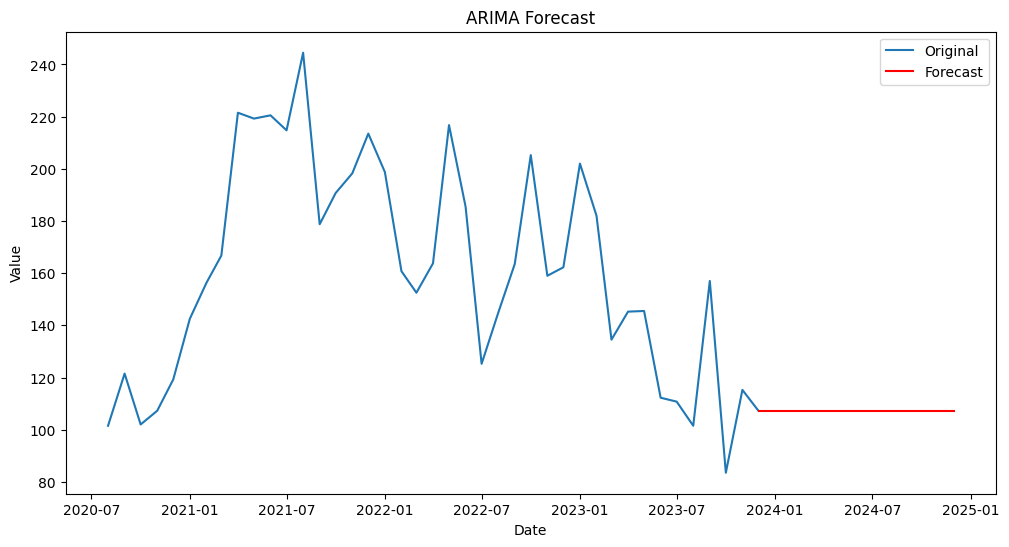

In [ ]:
forecast_steps = 365  # 365일 예측
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=df_hw2_t['시간'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:]

# 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_hw2_t['시간'], df_hw2_t['값'], label='Original')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Haeun\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


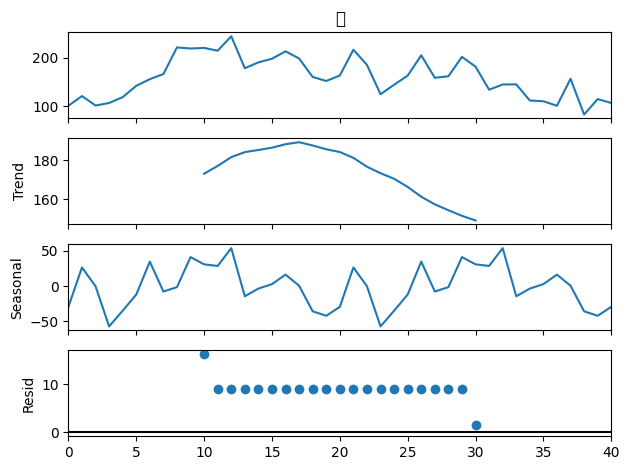

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 분해
decomp = seasonal_decompose(df_hw2_t['값'], model='additive', period=20)
# 분해 결과 시각화
decomp.plot()
plt.show()

# Trend : 경향성
# Seasonal : 계절성
# Resid : 설명되지 않는 불규칙한 변동

In [ ]:
seasonal_order = (1, 1, 1, 20)
#                 P, D, Q, s
#         계절적 자기회귀, 계절적 차분, 계절적 이동평균, 주기

In [ ]:
# SARIMAX 모델 학습
sarima_model = SARIMAX(df_hw2_t['값'], order=(0,1,0), seasonal_order=seasonal_order)
fitted_sarima_model = sarima_model.fit()

c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Haeun\AppData\Local\Temp\ipykernel_3308\2243486019.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates_sarima = pd.date_range(start=df_2_t['시간'].iloc[-1], periods=step + 1, freq='M')[1:]


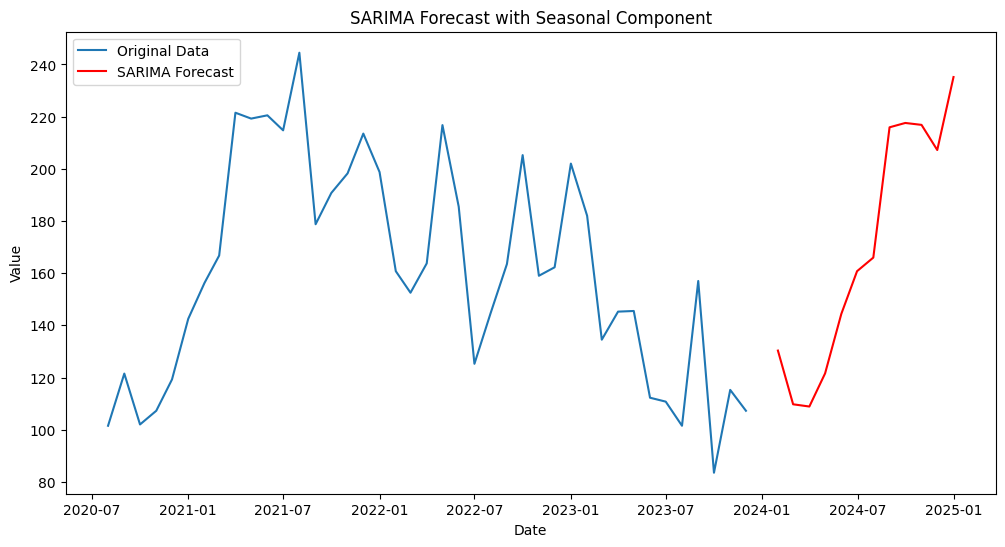

In [ ]:
step = 12
forecast_sarima = fitted_sarima_model.forecast(steps=step)
forecast_dates_sarima = pd.date_range(start=df_hw2_t['시간'].iloc[-1], periods=step + 1, freq='M')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df_hw2_t['시간'], df_hw2_t['값'], label='Original Data')
plt.plot(forecast_dates_sarima, forecast_sarima, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast with Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

#### 4대

In [ ]:
# ADF 테스트
result = adfuller(df_hw4_t['값'])
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 0.2848587175813283


In [ ]:
df_hw4_t['Value_diff'] = df_hw4_t['값'].diff()

C:\Users\Haeun\AppData\Local\Temp\ipykernel_3308\2519380630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4_t['Value_diff'] = df_4_t['값'].diff()


In [ ]:
df_hw4_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 1 to 41
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   시간          41 non-null     datetime64[ns]
 1   값           41 non-null     int64         
 2   Value_diff  40 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.1 KB


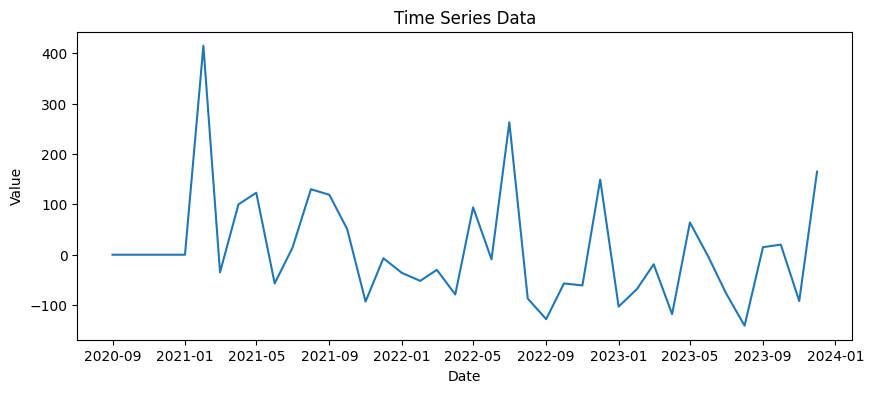

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_hw4_t['시간'][1:], df_hw4_t['Value_diff'][1:])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [ ]:
result = adfuller(df_hw4_t['Value_diff'].dropna())
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 2.7210288923752347e-08


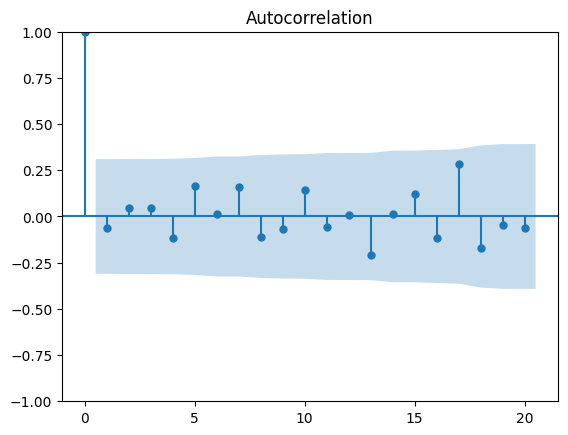

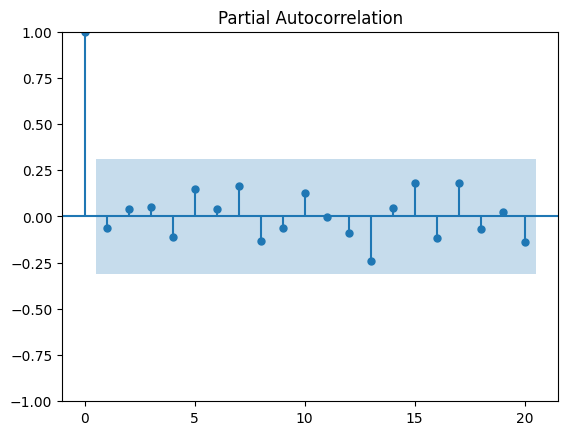

In [ ]:
# ACF 및 PACF 플롯
plot_acf(df_hw4_t['Value_diff'].dropna(), lags=20)
plt.show()

plot_pacf(df_hw4_t['Value_diff'].dropna(), lags=20)
plt.show()

In [ ]:
# ARIMA 모델 학습
order = (0, 1, 0)  # (p, d, q)
#                 pacf, d, acf
model = ARIMA(df_hw4_t['값'], order = order)
fitted_model = model.fit()

# 모델 요약
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      값   No. Observations:                   41
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -244.714
Date:                Wed, 22 Jan 2025   AIC                            491.428
Time:                        17:40:06   BIC                            493.117
Sample:                             0   HQIC                           492.039
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.206e+04   1623.735      7.427      0.000    8877.444    1.52e+04
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                31.07
Prob(Q):                              0.67   Pr

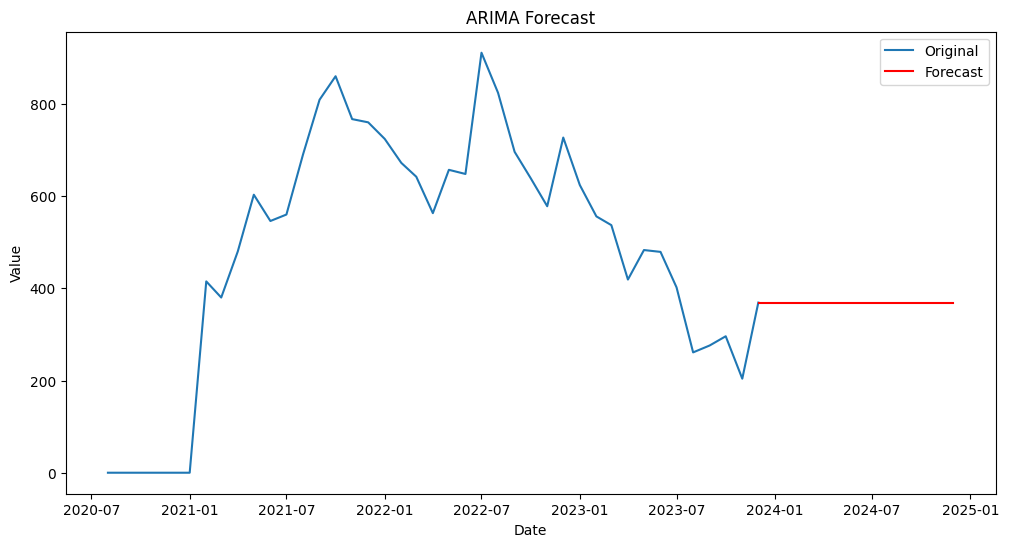

In [ ]:
forecast_steps = 365  # 365일 예측
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=df_hw4_t['시간'].iloc[-1], periods=forecast_steps + 1, freq='D')[1:]

# 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_hw4_t['시간'], df_hw4_t['값'], label='Original')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Haeun\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


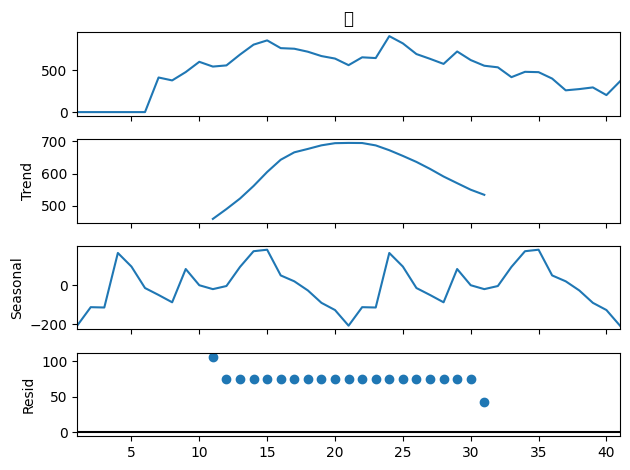

In [ ]:
# 시계열 분해
decomp = seasonal_decompose(df_hw4_t['값'], model='additive', period=20)
# 분해 결과 시각화
decomp.plot()
plt.show()

# Trend : 경향성
# Seasonal : 계절성
# Resid : 설명되지 않는 불규칙한 변동

In [ ]:
seasonal_order = (1, 1, 1, 20)
#                 P, D, Q, s
#         계절적 자기회귀, 계절적 차분, 계절적 이동평균, 주기

In [ ]:
# SARIMAX 모델 학습
sarima_model = SARIMAX(df_hw4_t['값'], order=(0,1,0), seasonal_order=seasonal_order)
fitted_sarima_model = sarima_model.fit()

c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Haeun\AppData\Local\Temp\ipykernel_3308\338106197.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates_sarima = pd.date_range(start=df_4_t['시간'].iloc[-1], periods=step + 1, freq='M')[1:]


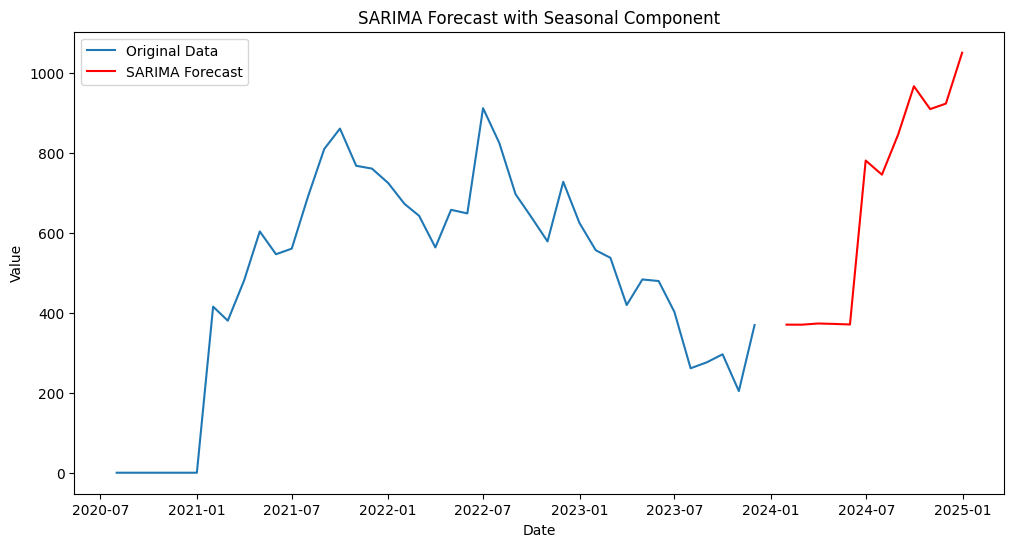

In [ ]:
step = 12
forecast_sarima = fitted_sarima_model.forecast(steps=step)
forecast_dates_sarima = pd.date_range(start=df_hw4_t['시간'].iloc[-1], periods=step + 1, freq='M')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df_hw4_t['시간'], df_hw4_t['값'], label='Original Data')
plt.plot(forecast_dates_sarima, forecast_sarima, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast with Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

- 화성시 공유차량 이용현황 시계열 분석 및 예측 결과, <br>
1대부터 4대까지 모든 차량의 이용 현황이 줄어드는 트렌드를 보이기 때문에, 현재보다 많은 수의 차량을 배치하는 것은 효율적이지 않을 수 있음.

## 하남시 공유차량 이용현황

In [ ]:
import pandas as pd
df_hanam = pd.read_csv('하남_이용_데이터_전체.csv')
df_hanam

,단지 명칭,단지 코드,2020년8월 이용 건수,2020년8월 이용 시간,2020년9월 이용 건수,2020년9월 이용 시간,2020년10월 이용 건수,2020년10월 이용 시간,2020년11월 이용 건수,2020년11월 이용 시간,...,2023년10월 이용 건수,2023년10월 이용 시간,2023년11월 이용 건수,2023년11월 이용 시간,2023년12월 이용 건수,2023년12월 이용 시간,전체 건수,전체 시간,차종,대수
0,하남감일 스윗시티1,C02258,0,0,12,26,44,120,43,131,...,23,35,42,86,19,33,2316,5651,모닝어반/올뉴K3,2.0
1,하남감일 스윗시티10,C02256,0,0,0,0,0,0,0,0,...,19,61,15,45,12,25,894,3067,더뉴레이,1.0
2,하남감일 스윗시티6(행복주택),C02384,0,0,9,64,52,184,72,272,...,32,94,26,117,44,180,2660,11438,더뉴레이/올뉴K3,2.0
3,하남감일 스윗시티8,C02408,0,0,0,0,0,0,0,0,...,33,105,48,128,42,119,2022,7807,더뉴레이/올뉴모닝/올뉴K3,3.0
4,하남감일 포엠포레,C02352,0,0,0,0,0,0,0,0,...,27,66,30,89,34,74,1019,3947,더뉴레이,1.0
5,하남미사강변 리슈빌,C02012,54,151,45,274,37,196,37,146,...,45,93,46,100,37,78,2014,6490,모닝어반/올뉴K3,2.0
6,하남미사강변 브라운스톤,C02126,12,49,6,29,11,51,13,46,...,10,19,13,26,6,10,633,2118,더뉴레이,1.0
7,하남미사강변 아란티움,C02127,0,0,0,0,0,0,4,4,...,26,53,18,47,22,41,1080,1919,더뉴레이,1.0
8,하남미사강변 해링턴플레이스,C01967,34,107,35,96,30,63,33,67,...,0,0,0,0,0,0,935,1867,NaN,NaN
9,하남미사강변12,C01801,10,23,2,2,4,10,4,28,...,0,0,0,0,0,0,124,480,NaN,NaN


In [ ]:
df_hanam['대수'] = df_hanam['대수'].fillna(1.0)

In [ ]:
df_hanam['차종'] = df_hanam['차종'].fillna('더뉴레이')

In [ ]:
df_hanam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 88 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   단지 명칭           16 non-null     object 
 1   단지 코드           15 non-null     object 
 2   2020년8월 이용 건수   16 non-null     int64  
 3   2020년8월 이용 시간   16 non-null     int64  
 4   2020년9월 이용 건수   16 non-null     int64  
 5   2020년9월 이용 시간   16 non-null     int64  
 6   2020년10월 이용 건수  16 non-null     int64  
 7   2020년10월 이용 시간  16 non-null     int64  
 8   2020년11월 이용 건수  16 non-null     int64  
 9   2020년11월 이용 시간  16 non-null     int64  
 10  2020년12월 이용 건수  16 non-null     int64  
 11  2020년12월 이용 시간  16 non-null     int64  
 12  2021년1월 이용 건수   16 non-null     int64  
 13  2021년1월 이용 시간   16 non-null     int64  
 14  2021년2월 이용 건수   16 non-null     int64  
 15  2021년2월 이용 시간   16 non-null     int64  
 16  2021년3월 이용 건수   16 non-null     int64  
 17  2021년3월 이용 시간   16 non-null     int64

In [ ]:
dfh2 = df_hanam[['단지 명칭','2020년8월 이용 시간',
 '2020년9월 이용 시간',
 '2020년10월 이용 시간',
 '2020년11월 이용 시간',
 '2020년12월 이용 시간',
 '2021년1월 이용 시간',
 '2021년2월 이용 시간',
 '2021년3월 이용 시간',
 '2021년4월 이용 시간',
 '2021년5월 이용 시간',
 '2021년6월 이용 시간',
 '2021년7월 이용 시간',
 '2021년8월 이용 시간',
 '2021년9월 이용 시간',
 '2021년10월 이용 시간',
 '2021년11월 이용 시간',
 '2021년12월 이용 시간',
 '2022년1월 이용 시간',
 '2022년2월 이용 시간',
 '2022년3월 이용 시간',
 '2022년4월 이용 시간',
 '2022년5월 이용 시간',
 '2022년6월 이용 시간',
 '2022년7월 이용 시간',
 '2022년8월 이용 시간',
 '2022년9월 이용 시간',
 '2022년10월 이용 시간',
 '2022년11월 이용 시간',
 '2022년12월 이용 시간',
 '2023년1월 이용 시간',
 '2023년2월 이용 시간',
 '2023년3월 이용 시간',
 '2023년4월 이용 시간',
 '2023년5월 이용 시간',
 '2023년6월 이용 시간',
 '2023년7월 이용 시간',
 '2023년8월 이용 시간',
 '2023년9월 이용 시간',
 '2023년10월 이용 시간',
 '2023년11월 이용 시간',
 '2023년12월 이용 시간', '대수']]

In [ ]:
dfh2['대수'].value_counts()

대수
1.0    9
2.0    4
5.0    2
3.0    1
Name: count, dtype: int64

In [ ]:
count_h1 = dfh2[dfh2['대수'] == 1.0]
count_h2 = dfh2[dfh2['대수'] == 2.0]
count_h3 = dfh2[dfh2['대수'] == 3.0]
count_h5 = dfh2[dfh2['대수'] == 5.0]

In [ ]:
count_h1.describe()

,2020년8월 이용 시간,2020년9월 이용 시간,2020년10월 이용 시간,2020년11월 이용 시간,2020년12월 이용 시간,2021년1월 이용 시간,2021년2월 이용 시간,2021년3월 이용 시간,2021년4월 이용 시간,2021년5월 이용 시간,...,2023년4월 이용 시간,2023년5월 이용 시간,2023년6월 이용 시간,2023년7월 이용 시간,2023년8월 이용 시간,2023년9월 이용 시간,2023년10월 이용 시간,2023년11월 이용 시간,2023년12월 이용 시간,대수
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,29.333333,23.333333,31.555556,32.000000,31.888889,25.222222,40.444444,43.666667,46.888889,52.333333,...,56.444444,36.888889,42.555556,39.000000,31.444444,46.444444,29.222222,25.555556,17.666667,1.0
std,35.791060,35.135452,31.373202,30.103986,23.207997,20.023597,30.451236,26.935107,46.398934,50.343818,...,46.152224,29.569598,31.504409,28.155816,22.869801,43.517557,27.967739,30.037939,25.293280,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,4.000000,18.000000,11.000000,14.000000,35.000000,18.000000,25.000000,...,25.000000,20.000000,23.000000,15.000000,22.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,23.000000,2.000000,33.000000,28.000000,34.000000,21.000000,52.000000,44.000000,31.000000,30.000000,...,51.000000,32.000000,46.000000,45.000000,29.000000,51.000000,19.000000,12.000000,6.000000,1.0
75%,43.000000,29.000000,51.000000,46.000000,50.000000,44.000000,61.000000,52.000000,79.000000,80.000000,...,107.000000,53.000000,61.000000,60.000000,41.000000,76.000000,53.000000,45.000000,25.000000,1.0
max,107.000000,96.000000,86.000000,86.000000,68.000000,51.000000,89.000000,83.000000,141.000000,164.000000,...,113.000000,80.000000,92.000000,73.000000,66.000000,111.000000,66.000000,89.000000,74.000000,1.0


In [ ]:
# 확인해보니 평균과 중앙값 차이가 크게 나지는 않지만, 중간중간 차이가 큰 부분이 많으므로 중앙값으로 계산
mean_values = count_h1.describe().loc["50%"]

# 중앙값을 한 줄짜리 데이터프레임으로 변환
mean_df_h1 = pd.DataFrame([mean_values], columns=mean_values.index)

In [ ]:
mean_values = count_h2.describe().loc["mean"]

# 평균을 한 줄짜리 데이터프레임으로 변환
mean_df_h2 = pd.DataFrame([mean_values], columns=mean_values.index)
mean_df_h3 = count_h3 # 3대짜리는 데이터 하나임

mean_values = count_h5.describe().loc["mean"]

# 평균을 한 줄짜리 데이터프레임으로 변환
mean_df_h5 = pd.DataFrame([mean_values], columns=mean_values.index)


In [ ]:
df_h1_t = mean_df_h1.transpose()
df_h2_t = mean_df_h2.transpose()
df_h3_t = mean_df_h3.transpose()
df_h5_t = mean_df_h5.transpose()

In [ ]:
df_h1_t = df_h1_t.reset_index()
df_h2_t = df_h2_t.reset_index()
df_h3_t = df_h3_t.reset_index()
df_h5_t = df_h5_t.reset_index()

In [ ]:
df_h1_t.columns = ['시간', '값']
df_h2_t.columns = ['시간', '값']
df_h3_t.columns = ['시간', '값']
df_h5_t.columns = ['시간', '값']


In [ ]:
df_h3_t = df_h3_t[1:]

In [ ]:
df_h3_t['값'] = df_h3_t['값'].astype(int)

In [ ]:
df_h1_t["시간"] = pd.to_datetime(
    df_h1_t["시간"].str.replace(" 이용 시간", "").str.replace("년", "-").str.replace("월", ""),
    format="%Y-%m"
)
df_h2_t["시간"] = pd.to_datetime(
    df_h2_t["시간"].str.replace(" 이용 시간", "").str.replace("년", "-").str.replace("월", ""),
    format="%Y-%m"
)
df_h3_t["시간"] = pd.to_datetime(
    df_h3_t["시간"].str.replace(" 이용 시간", "").str.replace("년", "-").str.replace("월", ""),
    format="%Y-%m"
)
df_h5_t["시간"] = pd.to_datetime(
    df_h5_t["시간"].str.replace(" 이용 시간", "").str.replace("년", "-").str.replace("월", ""),
    format="%Y-%m"
)


## 시계열 진행

#### 1대

In [ ]:
# ADF 테스트
result = adfuller(df_h1_t['값'])
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 0.34053458821131316


In [ ]:
df_h1_t['Value_diff'] = df_h1_t['값'].diff()

In [ ]:
df_h1_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   시간          41 non-null     datetime64[ns]
 1   값           41 non-null     float64       
 2   Value_diff  40 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.1 KB


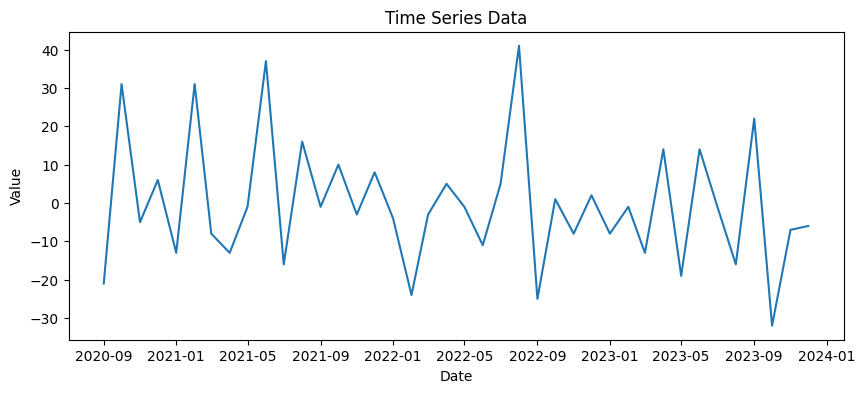

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_h1_t['시간'][1:], df_h1_t['Value_diff'][1:])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [ ]:
result = adfuller(df_h1_t['Value_diff'].dropna())
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 3.023747608143675e-17


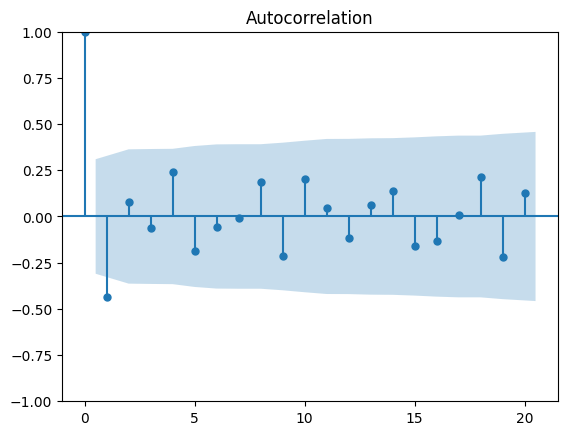

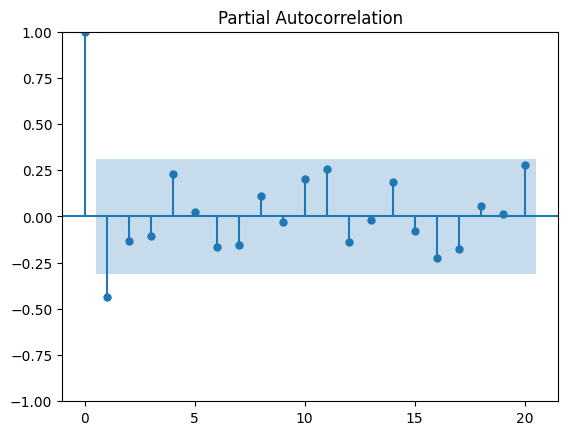

In [ ]:
# ACF 및 PACF 플롯
plot_acf(df_h1_t['Value_diff'].dropna(), lags=20)
plt.show()

plot_pacf(df_h1_t['Value_diff'].dropna(), lags=20)
plt.show()

In [ ]:
# ARIMA 모델 학습
order = (1, 1, 1)  # (p, d, q)
#                 pacf, d, acf
model = ARIMA(df_h1_t['값'], order = order)
fitted_model = model.fit()

# 모델 요약
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      값   No. Observations:                   41
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -164.276
Date:                Thu, 23 Jan 2025   AIC                            334.553
Time:                        12:28:18   BIC                            339.619
Sample:                             0   HQIC                           336.385
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2262      0.413     -0.547      0.584      -1.036       0.584
ma.L1         -0.2695      0.472     -0.571      0.568      -1.194       0.655
sigma2       214.8181     49.821      4.312      0.0

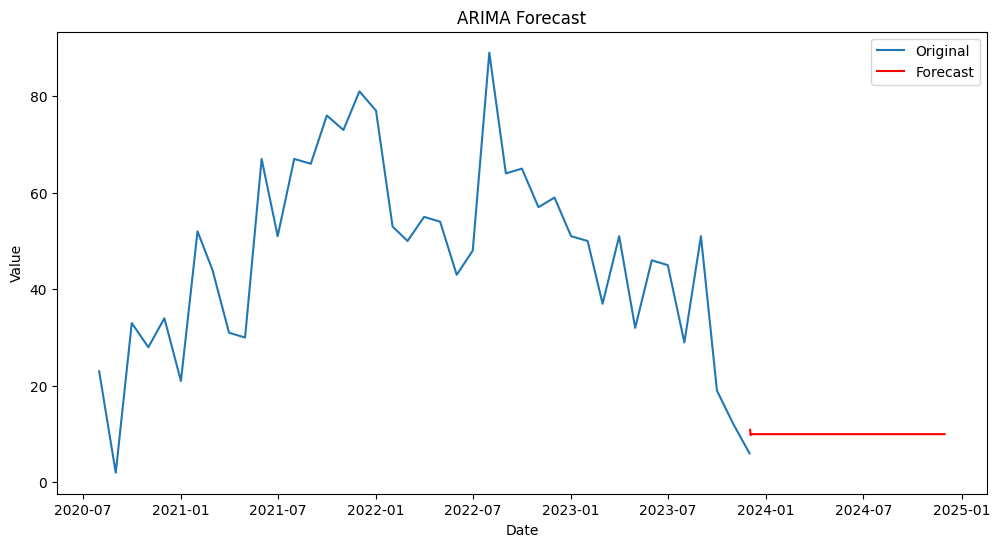

In [ ]:
forecast_steps = 365  # 365일 예측
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=df_h1_t['시간'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:]

# 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_h1_t['시간'], df_h1_t['값'], label='Original')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Haeun\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


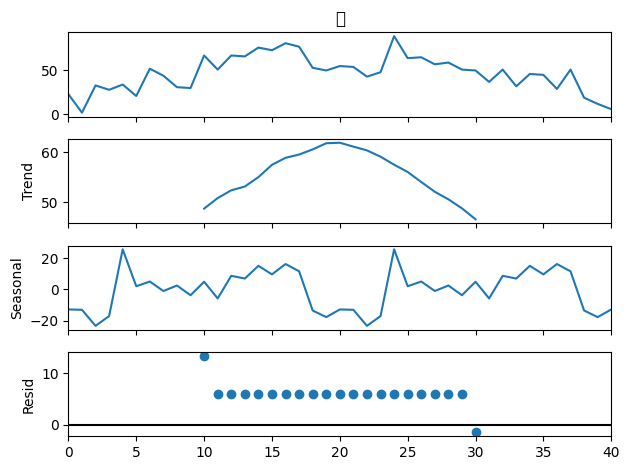

In [ ]:
# 시계열 분해
decomp = seasonal_decompose(df_h1_t['값'], model='additive', period=20)
# 분해 결과 시각화
decomp.plot()
plt.show()

# Trend : 경향성
# Seasonal : 계절성
# Resid : 설명되지 않는 불규칙한 변동

In [ ]:
seasonal_order = (1, 1, 1, 20)
#                 P, D, Q, s
#         계절적 자기회귀, 계절적 차분, 계절적 이동평균, 주기

In [ ]:
# SARIMAX 모델 학습
sarima_model = SARIMAX(df_h1_t['값'], order=(1,1,1), seasonal_order=seasonal_order)
fitted_sarima_model = sarima_model.fit()

c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Haeun\AppData\Local\Temp\ipykernel_15084\1855999744.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates_sarima = pd.date_range(start=df_h1_t['시간'].iloc[-1], periods=step + 1, freq='M')[1:]


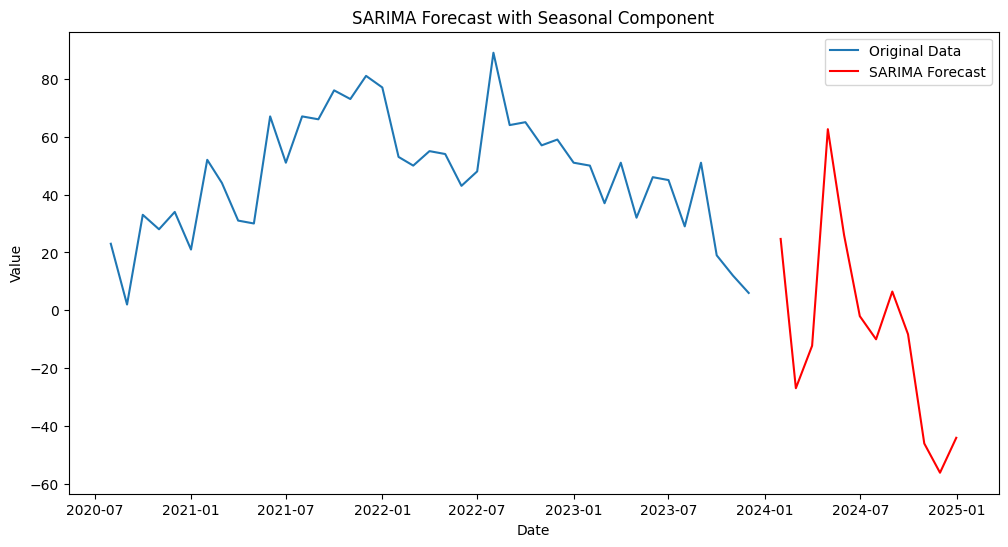

In [ ]:
step = 12
forecast_sarima = fitted_sarima_model.forecast(steps=step)
forecast_dates_sarima = pd.date_range(start=df_h1_t['시간'].iloc[-1], periods=step + 1, freq='M')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df_h1_t['시간'], df_h1_t['값'], label='Original Data')
plt.plot(forecast_dates_sarima, forecast_sarima, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast with Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

#### 2대

In [ ]:
# ADF 테스트
result = adfuller(df_h2_t['값'])
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 0.8616470861241561


In [ ]:
df_h2_t['Value_diff'] = df_h2_t['값'].diff()

In [ ]:
df_h2_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   시간          41 non-null     datetime64[ns]
 1   값           41 non-null     float64       
 2   Value_diff  40 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.1 KB


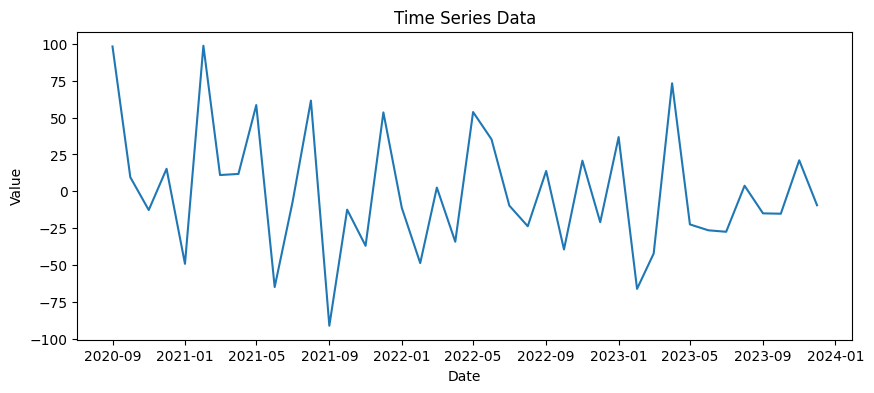

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_h2_t['시간'][1:], df_h2_t['Value_diff'][1:])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [ ]:
result = adfuller(df_h2_t['Value_diff'].dropna())
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 6.145148970735833e-08


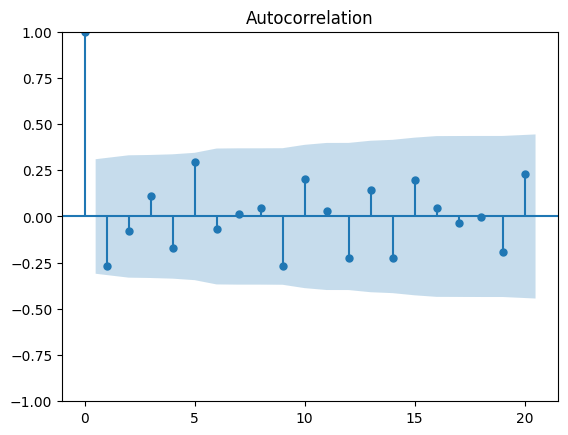

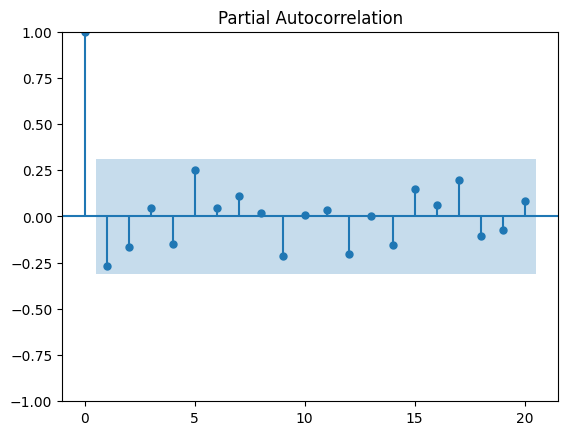

In [ ]:
# ACF 및 PACF 플롯
plot_acf(df_h2_t['Value_diff'].dropna(), lags=20)
plt.show()

plot_pacf(df_h2_t['Value_diff'].dropna(), lags=20)
plt.show()

In [ ]:
# ARIMA 모델 학습
order = (0, 1, 0)  # (p, d, q)
#                 pacf, d, acf
model = ARIMA(df_h2_t['값'], order = order)
fitted_model = model.fit()

# 모델 요약
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      값   No. Observations:                   41
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -207.142
Date:                Thu, 23 Jan 2025   AIC                            416.285
Time:                        12:31:48   BIC                            417.973
Sample:                             0   HQIC                           416.895
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1843.1244    424.237      4.345      0.000    1011.636    2674.613
Ljung-Box (L1) (Q):                   3.05   Jarque-Bera (JB):                 1.22
Prob(Q):                              0.08   Pr

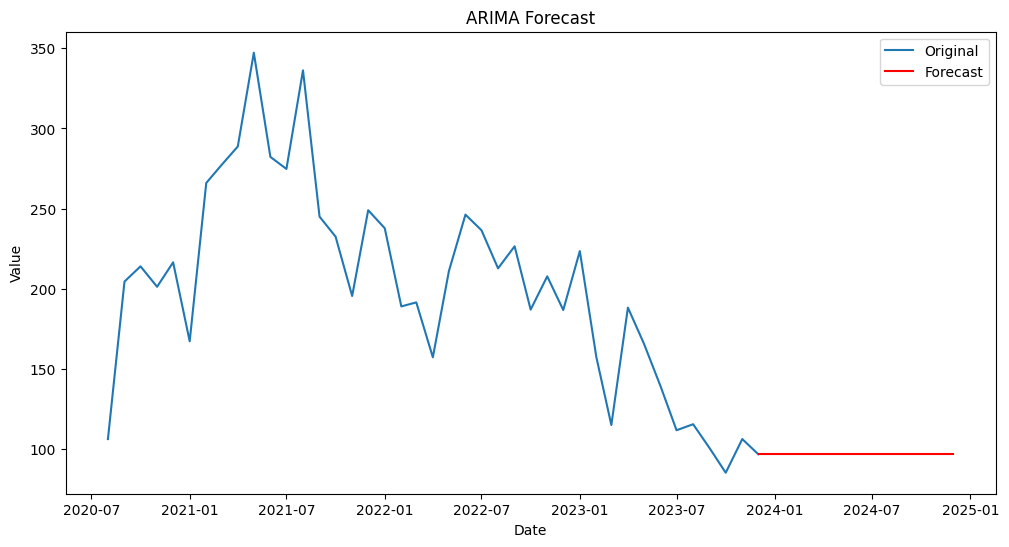

In [ ]:
forecast_steps = 365  # 365일 예측
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=df_h2_t['시간'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:]

# 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_h2_t['시간'], df_h2_t['값'], label='Original')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Haeun\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


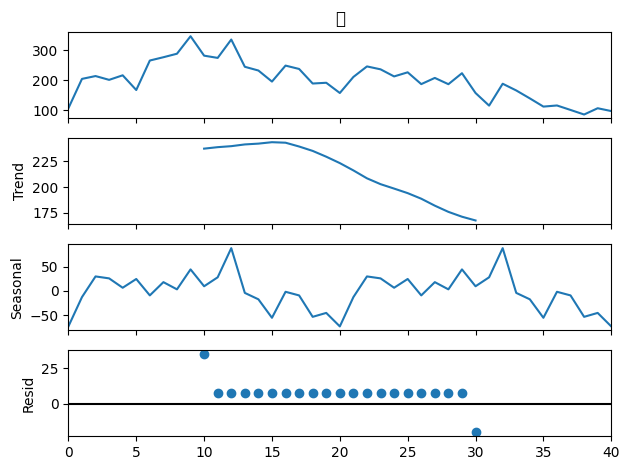

In [ ]:
# 시계열 분해
decomp = seasonal_decompose(df_h2_t['값'], model='additive', period=20)
# 분해 결과 시각화
decomp.plot()
plt.show()

# Trend : 경향성
# Seasonal : 계절성
# Resid : 설명되지 않는 불규칙한 변동

In [ ]:
seasonal_order = (1, 1, 1, 20)
#                 P, D, Q, s
#         계절적 자기회귀, 계절적 차분, 계절적 이동평균, 주기

In [ ]:
# SARIMAX 모델 학습
sarima_model = SARIMAX(df_h2_t['값'], order=(0,1,0), seasonal_order=seasonal_order)
fitted_sarima_model = sarima_model.fit()

c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Haeun\AppData\Local\Temp\ipykernel_15084\1309634395.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates_sarima = pd.date_range(start=df_h2_t['시간'].iloc[-1], periods=step + 1, freq='M')[1:]


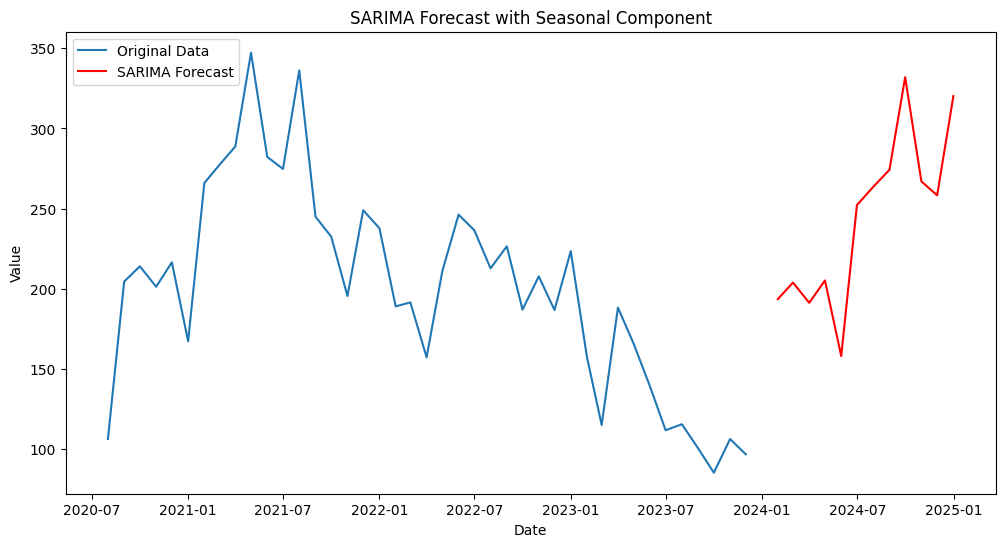

In [ ]:
step = 12
forecast_sarima = fitted_sarima_model.forecast(steps=step)
forecast_dates_sarima = pd.date_range(start=df_h2_t['시간'].iloc[-1], periods=step + 1, freq='M')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df_h2_t['시간'], df_h2_t['값'], label='Original Data')
plt.plot(forecast_dates_sarima, forecast_sarima, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast with Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

#### 3대

In [ ]:
# ADF 테스트
result = adfuller(df_h3_t['값'])
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 0.12377934801302837


In [ ]:
df_h3_t['Value_diff'] = df_h3_t['값'].diff()

In [ ]:
df_h3_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   시간          41 non-null     datetime64[ns]
 1   값           41 non-null     int64         
 2   Value_diff  40 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.1 KB


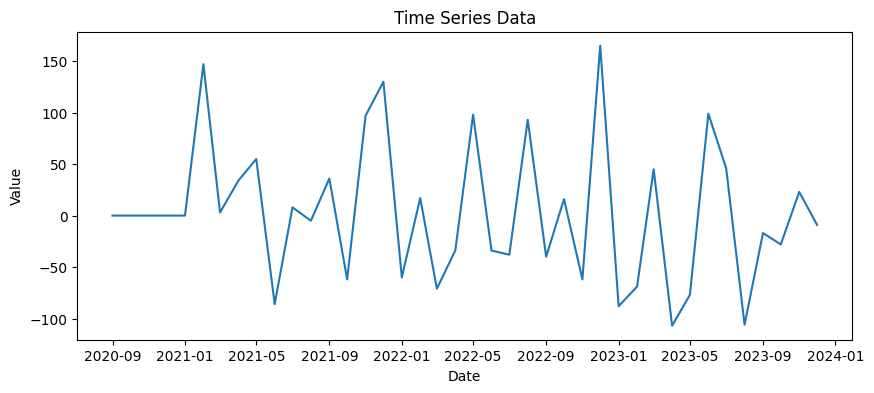

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_h3_t['시간'][1:], df_h3_t['Value_diff'][1:])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [ ]:
result = adfuller(df_h3_t['Value_diff'].dropna())
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 8.879775257175976e-08


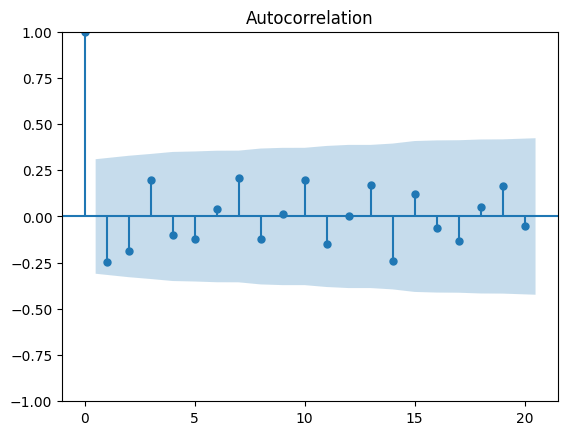

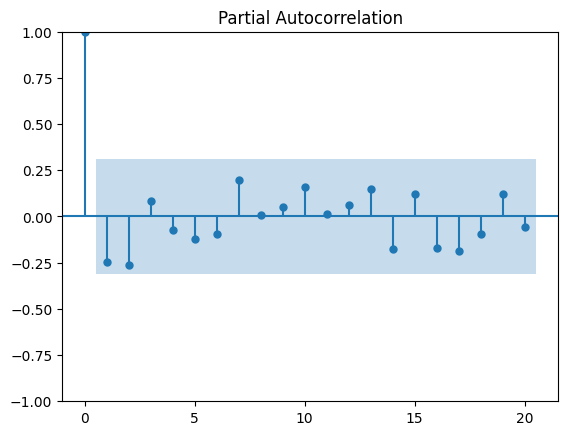

In [ ]:
# ACF 및 PACF 플롯
plot_acf(df_h3_t['Value_diff'].dropna(), lags=20)
plt.show()

plot_pacf(df_h3_t['Value_diff'].dropna(), lags=20)
plt.show()

In [ ]:
# ARIMA 모델 학습
order = (0, 1, 0)  # (p, d, q)
#                 pacf, d, acf
model = ARIMA(df_h3_t['값'], order = order)
fitted_model = model.fit()

# 모델 요약
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      값   No. Observations:                   41
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -225.579
Date:                Thu, 23 Jan 2025   AIC                            453.158
Time:                        12:34:39   BIC                            454.847
Sample:                             0   HQIC                           453.769
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4634.2076   1104.034      4.198      0.000    2470.341    6798.074
Ljung-Box (L1) (Q):                   2.66   Jarque-Bera (JB):                 1.97
Prob(Q):                              0.10   Pr

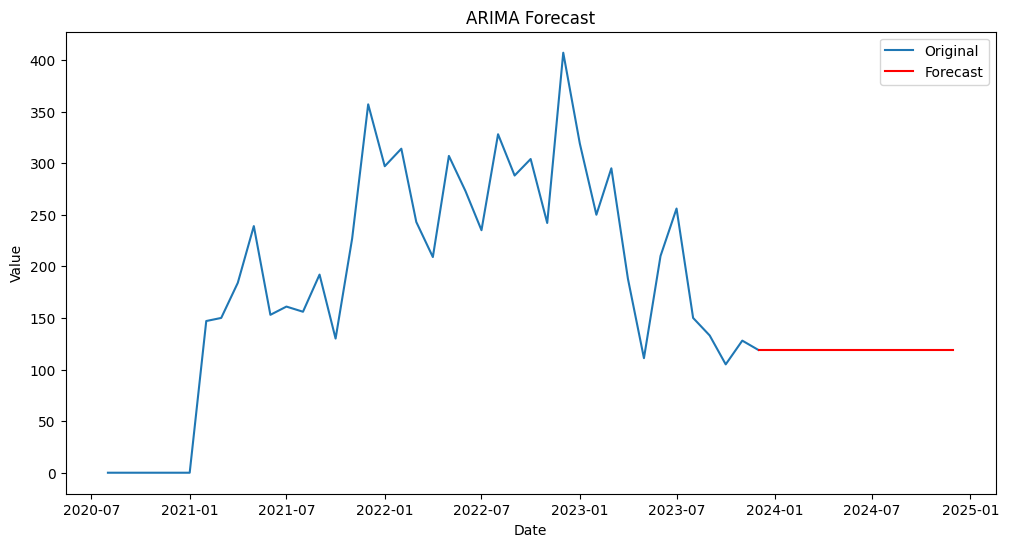

In [ ]:
forecast_steps = 365  # 365일 예측
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=df_h3_t['시간'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:]

# 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_h3_t['시간'], df_h3_t['값'], label='Original')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Haeun\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


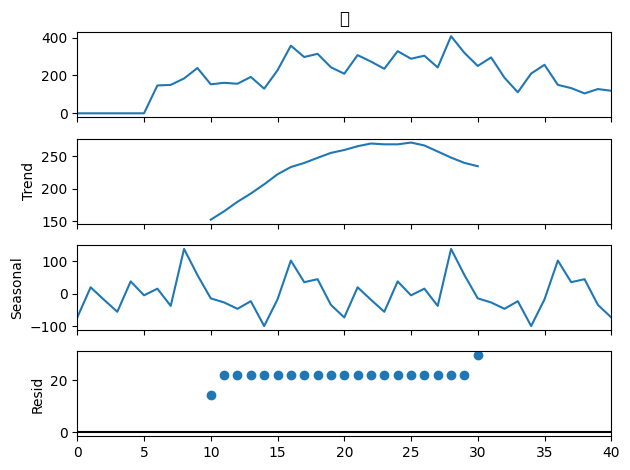

In [ ]:
# 시계열 분해
decomp = seasonal_decompose(df_h3_t['값'], model='additive', period=20)
# 분해 결과 시각화
decomp.plot()
plt.show()

# Trend : 경향성
# Seasonal : 계절성
# Resid : 설명되지 않는 불규칙한 변동

In [ ]:
seasonal_order = (1, 1, 1, 15)
#                 P, D, Q, s
#         계절적 자기회귀, 계절적 차분, 계절적 이동평균, 주기

In [ ]:
# SARIMAX 모델 학습
sarima_model = SARIMAX(df_h3_t['값'], order=(0,1,0), seasonal_order=seasonal_order)
fitted_sarima_model = sarima_model.fit()

c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


C:\Users\Haeun\AppData\Local\Temp\ipykernel_15084\4164585901.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates_sarima = pd.date_range(start=df_h3_t['시간'].iloc[-1], periods=step + 1, freq='M')[1:]


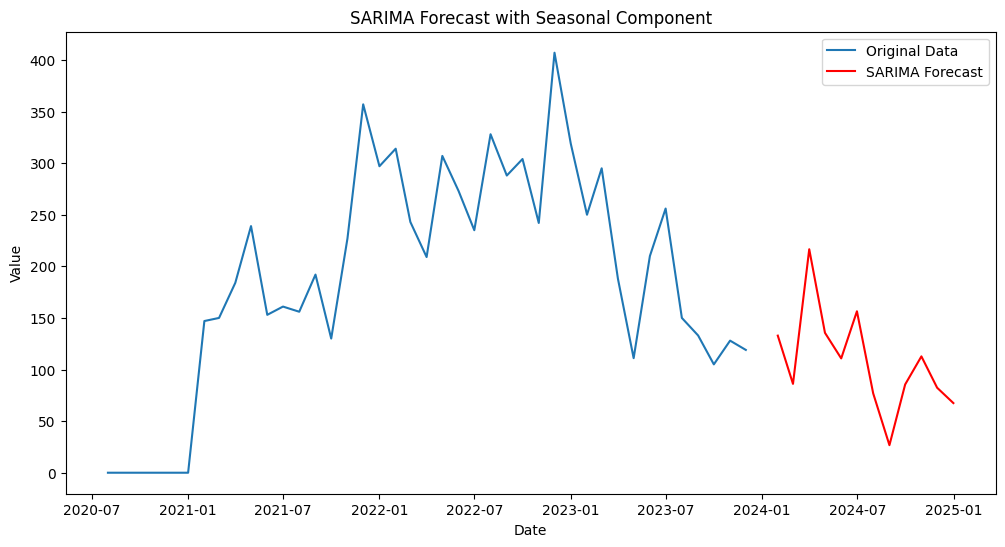

In [ ]:
step = 12
forecast_sarima = fitted_sarima_model.forecast(steps=step)
forecast_dates_sarima = pd.date_range(start=df_h3_t['시간'].iloc[-1], periods=step + 1, freq='M')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df_h3_t['시간'], df_h3_t['값'], label='Original Data')
plt.plot(forecast_dates_sarima, forecast_sarima, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast with Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

#### 5대

In [ ]:
result = adfuller(df_h5_t['값'])
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 0.6501324898599201


In [ ]:
df_h5_t['Value_diff'] = df_h5_t['값'].diff()

In [ ]:
df_h5_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   시간          41 non-null     datetime64[ns]
 1   값           41 non-null     float64       
 2   Value_diff  40 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.1 KB


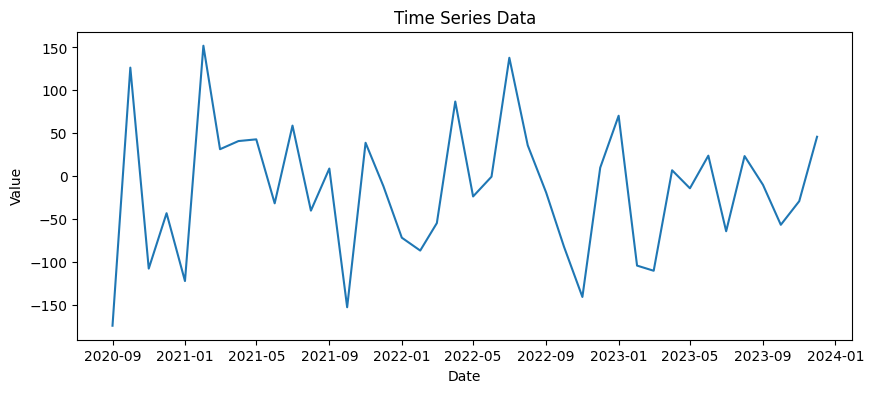

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_h5_t['시간'][1:], df_h5_t['Value_diff'][1:])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [ ]:
result = adfuller(df_h5_t['Value_diff'].dropna())
#print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
#print("Critical Values:", result[4])

p-value: 5.0598813165460296e-11


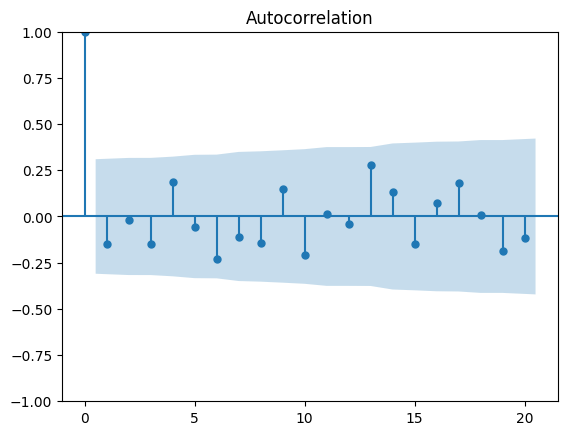

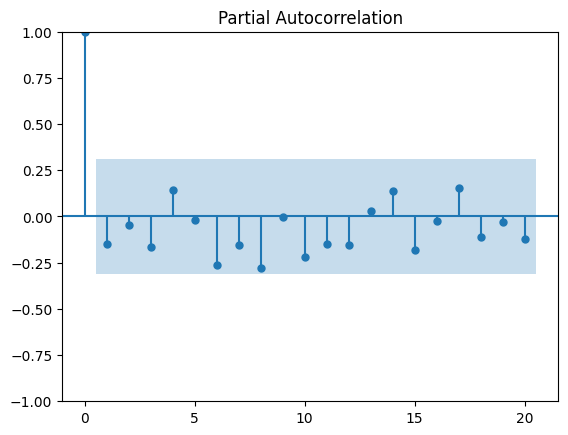

In [ ]:
# ACF 및 PACF 플롯
plot_acf(df_h5_t['Value_diff'].dropna(), lags=20)
plt.show()

plot_pacf(df_h5_t['Value_diff'].dropna(), lags=20)
plt.show()

In [ ]:
# ARIMA 모델 학습
order = (0, 1, 0)  # (p, d, q)
#                 pacf, d, acf
model = ARIMA(df_h5_t['값'], order = order)
fitted_model = model.fit()

# 모델 요약
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      값   No. Observations:                   41
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -231.063
Date:                Thu, 23 Jan 2025   AIC                            464.126
Time:                        12:38:44   BIC                            465.815
Sample:                             0   HQIC                           464.737
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6095.5425   1512.526      4.030      0.000    3131.046    9060.039
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                 0.23
Prob(Q):                              0.32   Pr

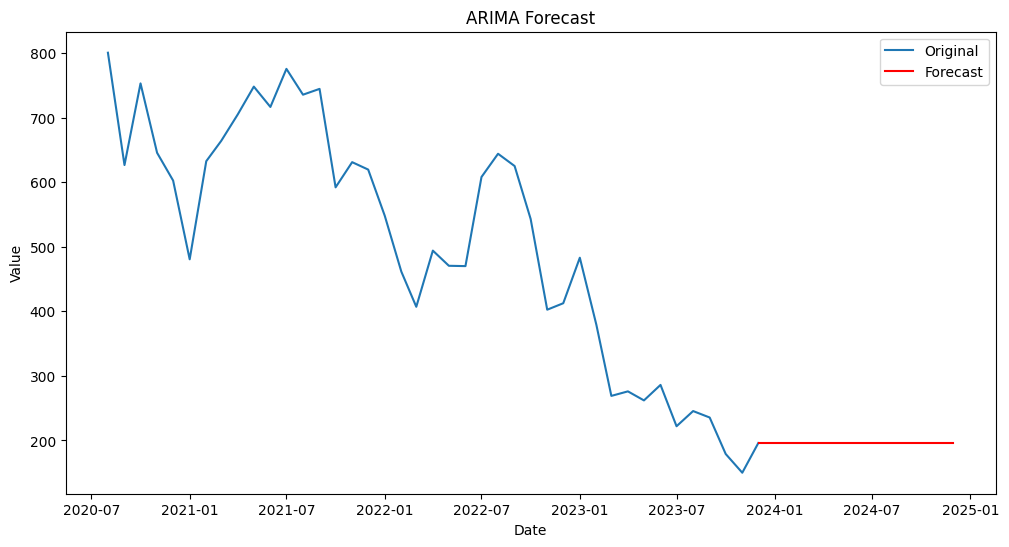

In [ ]:
forecast_steps = 365  # 365일 예측
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=df_h5_t['시간'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:]

# 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_h5_t['시간'], df_h5_t['값'], label='Original')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\Haeun\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


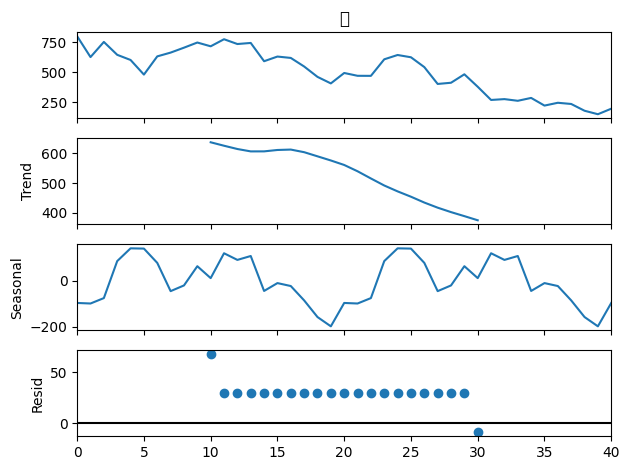

In [ ]:
# 시계열 분해
decomp = seasonal_decompose(df_h5_t['값'], model='additive', period=20)
# 분해 결과 시각화
decomp.plot()
plt.show()

# Trend : 경향성
# Seasonal : 계절성
# Resid : 설명되지 않는 불규칙한 변동

In [ ]:
seasonal_order = (1, 1, 1, 20)
#                 P, D, Q, s
#         계절적 자기회귀, 계절적 차분, 계절적 이동평균, 주기

In [ ]:
# SARIMAX 모델 학습
sarima_model = SARIMAX(df_h5_t['값'], order=(1,1,1), seasonal_order=seasonal_order)
fitted_sarima_model = sarima_model.fit()

c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Haeun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum

C:\Users\Haeun\AppData\Local\Temp\ipykernel_15084\4143274942.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates_sarima = pd.date_range(start=df_h5_t['시간'].iloc[-1], periods=step + 1, freq='M')[1:]


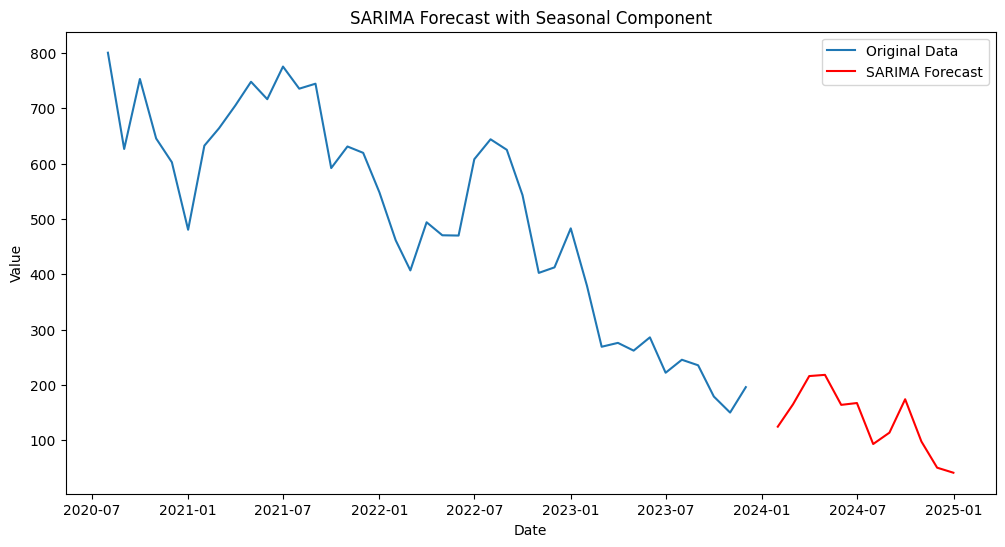

In [ ]:
step = 12
forecast_sarima = fitted_sarima_model.forecast(steps=step)
forecast_dates_sarima = pd.date_range(start=df_h5_t['시간'].iloc[-1], periods=step + 1, freq='M')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df_h5_t['시간'], df_h5_t['값'], label='Original Data')
plt.plot(forecast_dates_sarima, forecast_sarima, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast with Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()